In [429]:
# Imports
import imageio.v3 as imageio
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from dataclasses import dataclass
from typing import Literal
import seaborn as sns
from matplotlib import cm
from sklearn.datasets import make_moons

# Lab21

In [65]:
# Cost functions

def cost_cross_entropy(y, yhat):
    eps = 1e-8
    return -(yhat * np.log(y+eps) + (1-yhat) * np.log(1-y+eps))

def cost_cross_entropy_derivative(y, yhat):
    eps = 1e-8
    return (1-yhat)/(1-y+eps) - yhat/(y+eps)


def cost_mse(y, yhat):
    return np.sum((yhat - y)**2) / (2 * y.shape[0])

def cost_mse_derivative(y, yhat):
    return -2 * np.sum((yhat - y))


In [150]:
# Forward propagation & Backward propagation variants

def f(z):
    return 1 / (1 + np.exp(-z))

def dfdz(z):
    return f(z) * (1 - f(z))

def forward(x, w, b):
    return f(np.matmul(x,w)+b)

## Option one: use the given derivatives (clearer)
def backward1(x, w, b, y, yhat, alpha, dJdy):
    z = np.dot(x, w)
    delta = dJdy(y, yhat) * dfdz(z)

    dw = np.reshape(delta*x, (x.shape[0], -1))
    db = delta

    w -= alpha*dw
    b -= alpha*db

    return w, b

## Option two: use the explicit calculted form, uses cross entropy (faster)
def backward2(x, w, b, y, yhat, alpha):  # w not needed for this form
    delta = ( y*(1-yhat) - yhat*(1-y) )

    dw = np.reshape(delta*x, (2, -1))
    db = delta

    w -= alpha*dw
    b -= alpha*db

    return w, b

def backward3(X, w, b, y, yhat, alpha):
    delta = ( y*(1-yhat) - yhat*(1-y) )

    dw = np.reshape(np.mean(delta * X, axis=0), (2, -1))
    db = np.mean(delta)

    w -= alpha*dw
    b -= alpha*db

    return w, b

In [148]:
# Training function

def train(X, yhat, n_epoch, alpha, J=cost_cross_entropy, dJdy=cost_cross_entropy_derivative, rounding=0):
    costs = np.zeros(shape=(n_epoch,))

    np.random.seed(1)
    w = np.random.normal(0, 0.01, size=(X.shape[1],1))
    b = np.random.normal(0, 0.01)

    for epoch in range(n_epoch):

        for i, x in enumerate(X):
            y = forward(x, w, b)  # prediction for one sample
            w, b = backward1(x, w, b, y, yhat[i], alpha, dJdy)  # take step

        # Calculate total cost after epoch
        predictions = forward(X, w, b)  # predictions for entire set
        costs[epoch] = np.mean(J(predictions, yhat))  # mean cost per sample

        # report progress
        if ((epoch % 10) == 0) or (epoch == (n_epoch - 1)):
            accuracy = np.mean((predictions.round(rounding) - yhat) < 1/(10**rounding))  # current accuracy on entire set
            print('Training accuracy after epoch {}: {:.4%}'.format(epoch, accuracy))

    return w, b, costs

def train_batched(X, yhat, n_epoch, alpha, rounding=0):
    costs = np.zeros(shape=(n_epoch,))

    J = cost_cross_entropy

    np.random.seed(1)
    w = np.random.normal(0, 0.01, size=(X.shape[1],1))
    b = np.random.normal(0, 0.01)

    for epoch in range(n_epoch):
        y = forward(X, w, b)
        w, b = backward3(X, w, b, y, yhat, alpha)

        # Calculate total cost after epoch
        predictions = forward(X, w, b)  # predictions for entire set
        costs[epoch] = np.mean(J(predictions, yhat))  # mean cost per sample

        # report progress
        if ((epoch % 10) == 0) or (epoch == (n_epoch - 1)):
            accuracy = np.mean((predictions.round(rounding) - yhat) < 1/(10**rounding))  # current accuracy on entire set
            print('Training accuracy after epoch {}: {:.4%}'.format(epoch, accuracy))

    return w, b, costs


In [66]:
# 1. Studijuokite (Lab21) pateiktą interaktyvų programos kodą.

# [x] Done

Training accuracy after epoch 0: 75.0000%
Training accuracy after epoch 10: 100.0000%
Training accuracy after epoch 20: 100.0000%
Training accuracy after epoch 30: 50.0000%
Training accuracy after epoch 40: 50.0000%
Training accuracy after epoch 50: 50.0000%
Training accuracy after epoch 60: 50.0000%
Training accuracy after epoch 70: 50.0000%
Training accuracy after epoch 80: 50.0000%
Training accuracy after epoch 90: 50.0000%
Training accuracy after epoch 100: 50.0000%
Training accuracy after epoch 110: 50.0000%
Training accuracy after epoch 120: 50.0000%
Training accuracy after epoch 130: 50.0000%
Training accuracy after epoch 140: 50.0000%
Training accuracy after epoch 150: 50.0000%
Training accuracy after epoch 160: 50.0000%
Training accuracy after epoch 170: 50.0000%
Training accuracy after epoch 180: 50.0000%
Training accuracy after epoch 190: 50.0000%
Training accuracy after epoch 199: 50.0000%


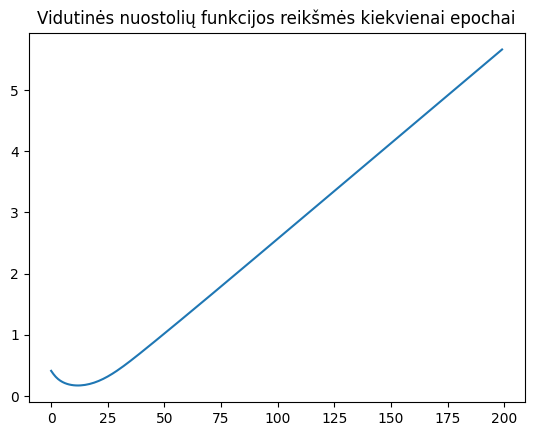

In [68]:
# 2. Pakeiskite parametrus - mokymosi greiti, epochų skaičių.

X = np.array([[0,0],[0,1],[1,0],[1,1]])
yhat = np.array([[0],[1],[1],[1]])

w, b, costs = train(X, yhat, 200, 1)
plt.plot(costs);
plt.title('Vidutinės nuostolių funkcijos reikšmės kiekvienai epochai');

Training accuracy after epoch 0: 75.0000%
Training accuracy after epoch 10: 100.0000%
Training accuracy after epoch 20: 100.0000%
Training accuracy after epoch 30: 100.0000%
Training accuracy after epoch 40: 100.0000%
Training accuracy after epoch 50: 100.0000%
Training accuracy after epoch 60: 100.0000%
Training accuracy after epoch 70: 100.0000%
Training accuracy after epoch 80: 100.0000%
Training accuracy after epoch 90: 100.0000%
Training accuracy after epoch 100: 100.0000%
Training accuracy after epoch 110: 100.0000%
Training accuracy after epoch 120: 100.0000%
Training accuracy after epoch 130: 100.0000%
Training accuracy after epoch 140: 100.0000%
Training accuracy after epoch 150: 100.0000%
Training accuracy after epoch 160: 100.0000%
Training accuracy after epoch 170: 100.0000%
Training accuracy after epoch 180: 100.0000%
Training accuracy after epoch 190: 100.0000%
Training accuracy after epoch 199: 100.0000%


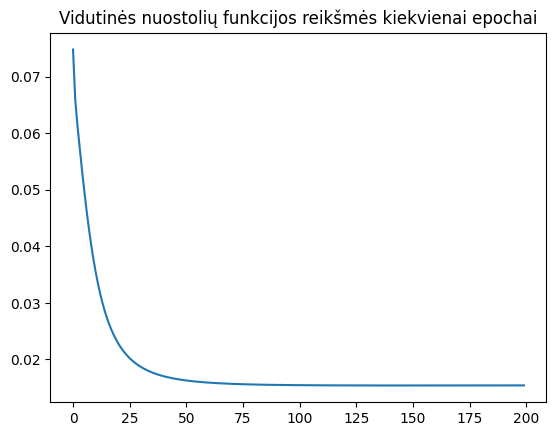

In [69]:
# 3. Pakeiskite nuostolių funkciją į MSE.

X = np.array([[0,0],[0,1],[1,0],[1,1]])
yhat = np.array([[0],[1],[1],[1]])

w, b, costs = train(X, yhat, 200, 1, cost_mse, cost_mse_derivative)
plt.plot(costs);
plt.title('Vidutinės nuostolių funkcijos reikšmės kiekvienai epochai');

Training accuracy after epoch 0: 55.8904%
Training accuracy after epoch 10: 49.5890%
Training accuracy after epoch 20: 48.2192%
Training accuracy after epoch 30: 48.4932%
Training accuracy after epoch 40: 49.3151%
Training accuracy after epoch 50: 49.8630%
Training accuracy after epoch 60: 50.1370%
Training accuracy after epoch 70: 50.6849%
Training accuracy after epoch 80: 51.2329%
Training accuracy after epoch 90: 52.3288%
Training accuracy after epoch 100: 52.8767%
Training accuracy after epoch 110: 53.1507%
Training accuracy after epoch 120: 53.1507%
Training accuracy after epoch 130: 53.1507%
Training accuracy after epoch 140: 53.4247%
Training accuracy after epoch 150: 53.9726%
Training accuracy after epoch 160: 54.7945%
Training accuracy after epoch 170: 55.3425%
Training accuracy after epoch 180: 56.1644%
Training accuracy after epoch 190: 56.4384%
Training accuracy after epoch 200: 56.9863%
Training accuracy after epoch 210: 57.2603%
Training accuracy after epoch 220: 57.2603%

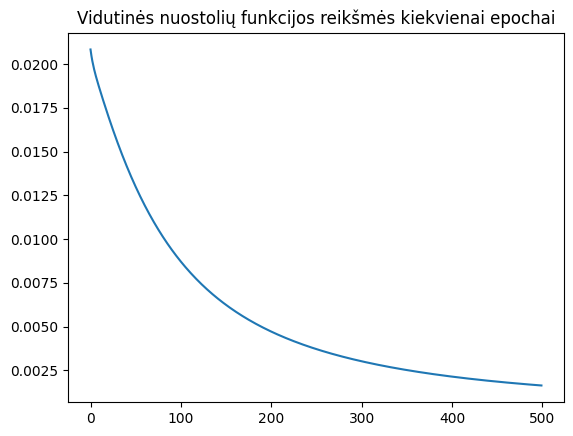

In [134]:
# 4. Raskite realaus pasaulio duomenų rinkinį ir pritaikykite šį modelį.

def map_value(x, from_min, from_max, to_min, to_max):
    return (x - from_min) / (from_max - from_min) * (to_max - to_min) + to_min

def normalize_column(column):
    min_value = min(column)
    max_value = max(column)

    return map(lambda x: map_value(float(x), min_value, max_value, 0, 1), column)

def prepare_number_list(numbers):
    return np.array(list(map(lambda value: [float(value)], numbers)))

df = pd.read_csv('assets/Ice Cream Sales - temperatures.csv')
X = prepare_number_list(normalize_column(df['Temperature'].values))
yhat = prepare_number_list(normalize_column(df['Ice Cream Profits'].values))

w, b, costs = train(X, yhat, 500, 0.003, cost_mse, cost_mse_derivative, rounding=3)
plt.plot(costs);
plt.title('Vidutinės nuostolių funkcijos reikšmės kiekvienai epochai');

Training accuracy after epoch 0: 75.0000%
Training accuracy after epoch 10: 75.0000%
Training accuracy after epoch 20: 100.0000%
Training accuracy after epoch 30: 100.0000%
Training accuracy after epoch 40: 100.0000%
Training accuracy after epoch 50: 100.0000%
Training accuracy after epoch 60: 100.0000%
Training accuracy after epoch 70: 100.0000%
Training accuracy after epoch 80: 100.0000%
Training accuracy after epoch 90: 100.0000%
Training accuracy after epoch 100: 100.0000%
Training accuracy after epoch 110: 100.0000%
Training accuracy after epoch 120: 100.0000%
Training accuracy after epoch 130: 100.0000%
Training accuracy after epoch 140: 100.0000%
Training accuracy after epoch 150: 100.0000%
Training accuracy after epoch 160: 100.0000%
Training accuracy after epoch 170: 100.0000%
Training accuracy after epoch 180: 100.0000%
Training accuracy after epoch 190: 100.0000%
Training accuracy after epoch 199: 100.0000%


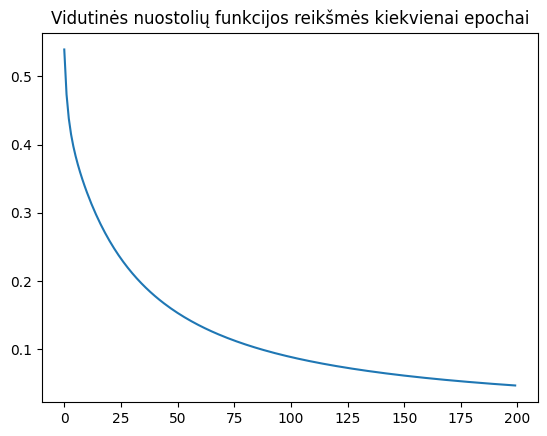

In [151]:
# 5. Perdarykite algoritmą, kad gradientas būtų skaičiuojamas ne atskiroms  X
# reikšmėms, o reikšmių rinkiniams (batches).

X = np.array([[0,0],[0,1],[1,0],[1,1]])
yhat = np.array([[0],[1],[1],[1]])

w, b, costs = train_batched(X, yhat, 200, 1)
plt.plot(costs);
plt.title('Vidutinės nuostolių funkcijos reikšmės kiekvienai epochai');

In [ ]:
# 6. Studijuokite ir eksperimentuokite naudojant https://playground.tensorflow.org

# [x] Done

# Lab22

In [223]:
# Visualization functions

def plot_graph(X, y, pred_line=None, losses=None):

    plots = 2 if losses!=None else 1

    fig = plt.figure(figsize=(8 * plots, 6))

    ax1 = fig.add_subplot(1, plots, 1)
    ax1.scatter(X, y, alpha=0.8)                                # Plot the original set of datapoints

    if(pred_line != None):
        x_line, y_line = pred_line['x_line'], pred_line['y_line']
        ax1.plot(x_line, y_line, linewidth=2, markersize=12, color='red', alpha=0.8)      # Plot the randomly generated line
        ax1.set_title('Predicted Line on set of Datapoints')
    else:
        ax1.set_title('Plot of Datapoints generated')

    ax1.set_xlabel('x')
    ax1.set_ylabel('y')

    if(losses!=None):
        ax2 = fig.add_subplot(1, plots, 2)
        ax2.plot(np.arange(len(losses)), losses, marker='o')

        ax2.set_xlabel('Epoch')
        ax2.set_ylabel('Loss')
        ax2.set_title('Loss')

    plt.show()

def plot_pred_line(X, y, w, b,losses=None):
    # Generate a set of datapoints on x for creating a line.
    # We shall consider the range of X_train for generating the line so that the line superposes the datapoints.
    x_line = np.linspace(np.min(X), np.max(X), 10)

    # Calculate the corresponding y with the parameter values of m & b
    y_line = w[0] * x_line + b

    plot_graph(X[:, 0], y, pred_line={'x_line': x_line, 'y_line':y_line}, losses=losses)

    return


In [206]:
# Main

def forward_prop(X, w, b):
    #y_pred = w * X + b
    y_pred = np.reshape(np.sum(w*X,1),(X.shape[0],1)) + b
    return y_pred

def compute_loss(y, y_pred):
    loss = np.mean((y_pred - y)**2)

    return loss

def grad_desc(w, b, X_train, y_train, y_pred):
    dw = np.mean(2*(y_pred - y_train) * X_train)
    db = np.mean(2*(y_pred - y_train))

    return dw, db

def back_prop(X_train, y_train, y_pred, w, b, l_r):
    dw, db = grad_desc(w, b, X_train, y_train, y_pred)

    w -= l_r * dw
    b -= l_r * db

    return w, b

def train_and_show(X, y, epochs, l_r, show_every=10):
    m = np.random.normal(scale=10)
    b = np.random.normal(scale=10)
    w = np.random.normal(scale=10, size=(X.shape[1],))

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    losses = []

    for i in range(epochs):
        y_pred = forward_prop(X_train, w, b)

        #print(y_pred)

        loss = compute_loss(y_train, y_pred)
        losses.append(loss)

        w, b = back_prop(X_train, y_train, y_pred, w, b, l_r)

        if (i%show_every==0):
            print('Epoch: ', i)
            print('Loss = ', loss)
            plot_pred_line(X_train, y_train, w, b, losses)

    del losses[:]

In [152]:
# 1. Studijuokite (Lab22) pateiktą interaktyvų programos kodą.

# [x] Done

Epoch:  0
Loss =  5110.689639001278


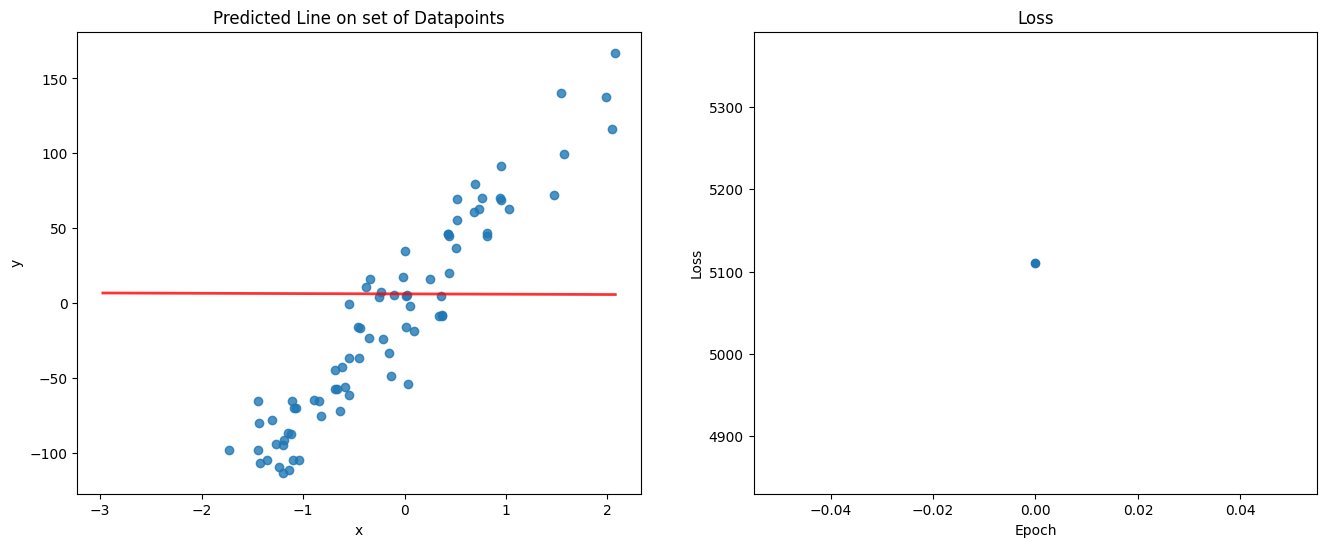

Epoch:  10
Loss =  2311.6455734490687


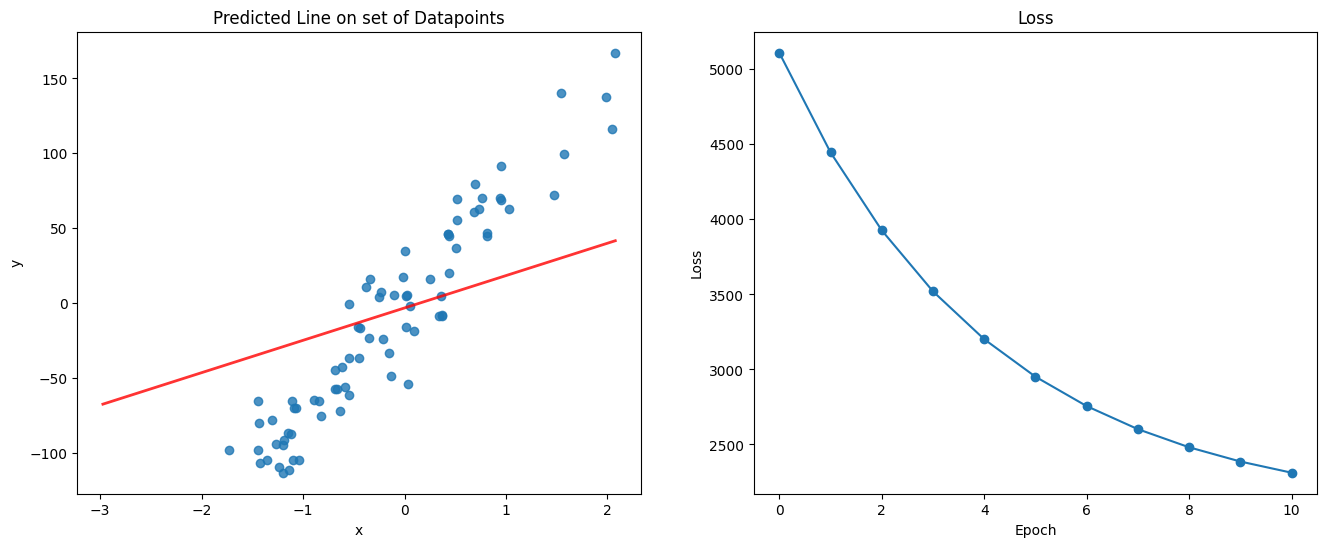

Epoch:  20
Loss =  2060.4015232793877


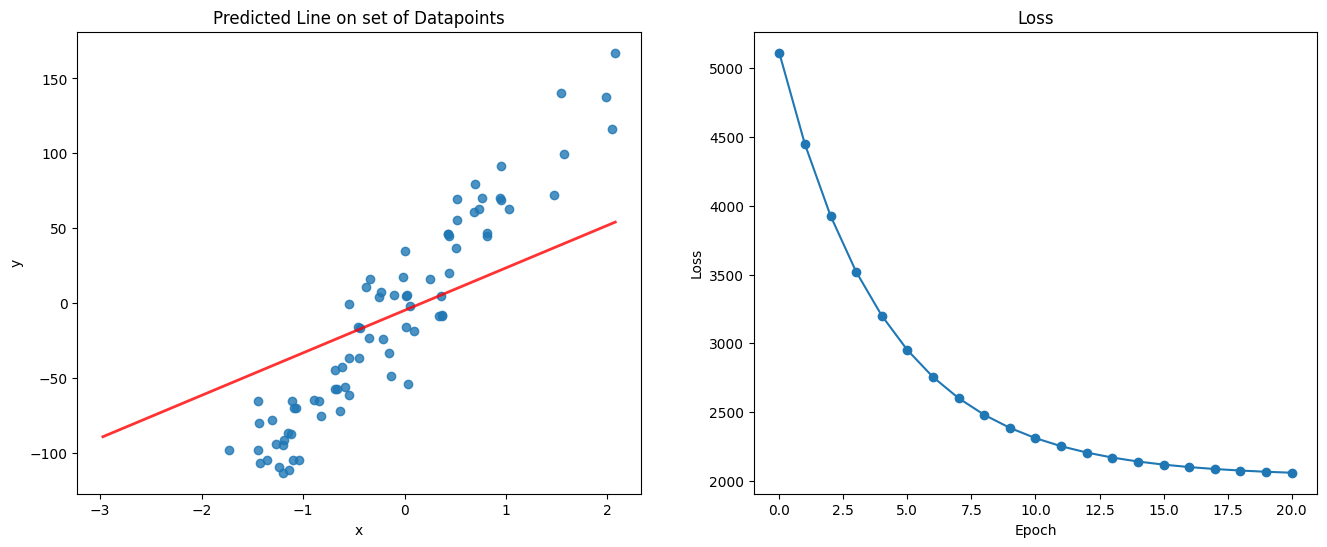

Epoch:  30
Loss =  2036.0784662556812


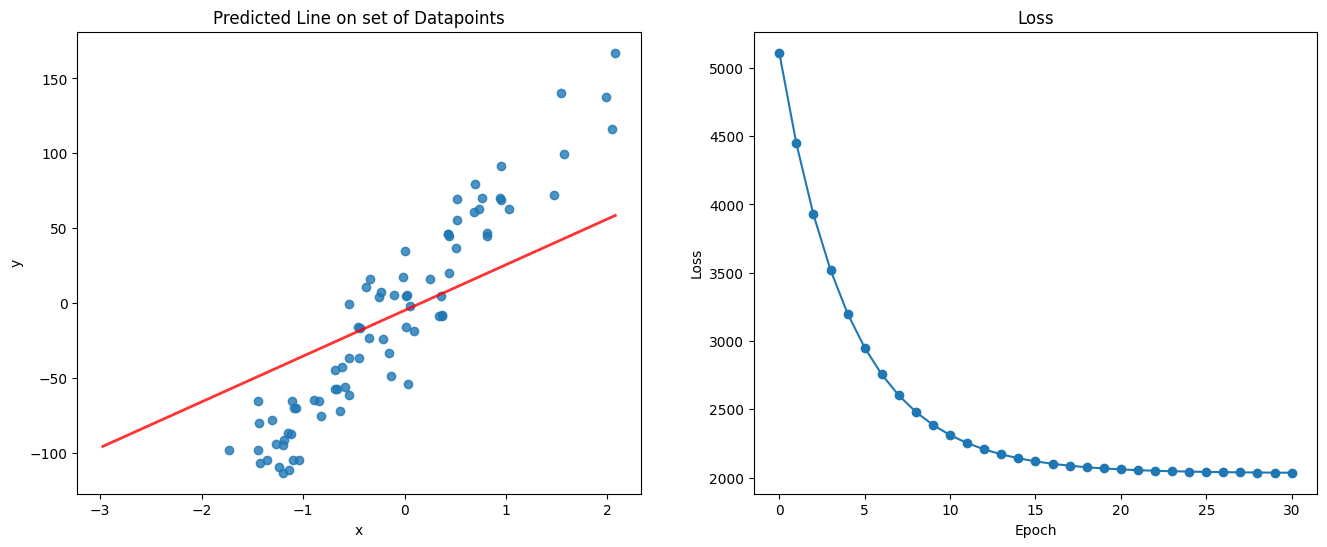

Epoch:  40
Loss =  2033.4746907569347


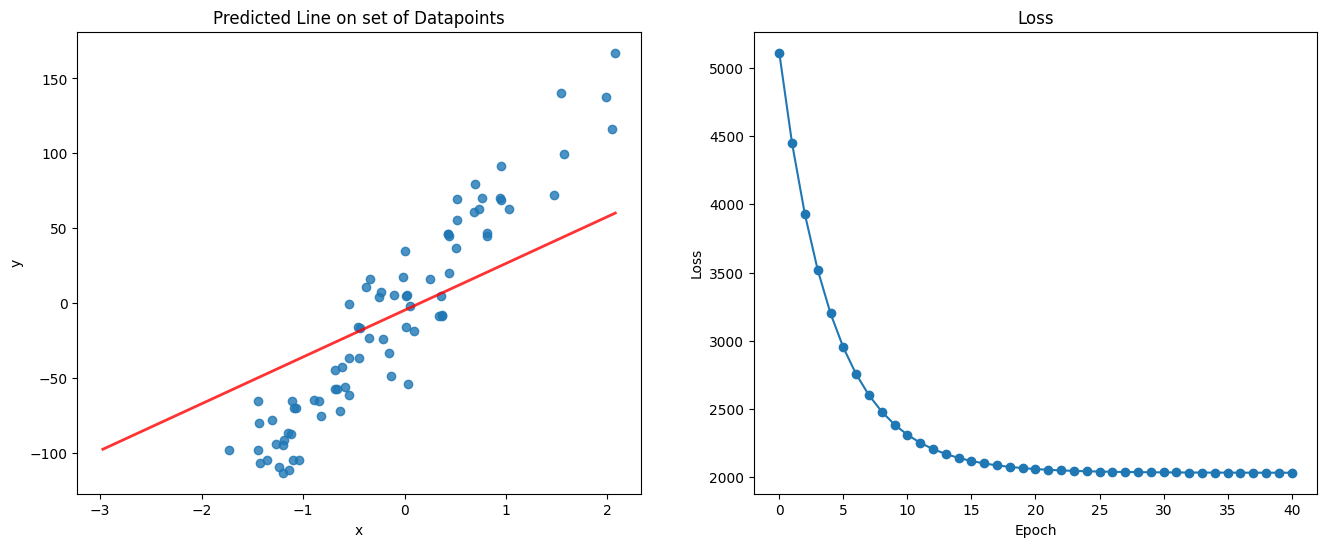

Epoch:  50
Loss =  2033.1634891959918


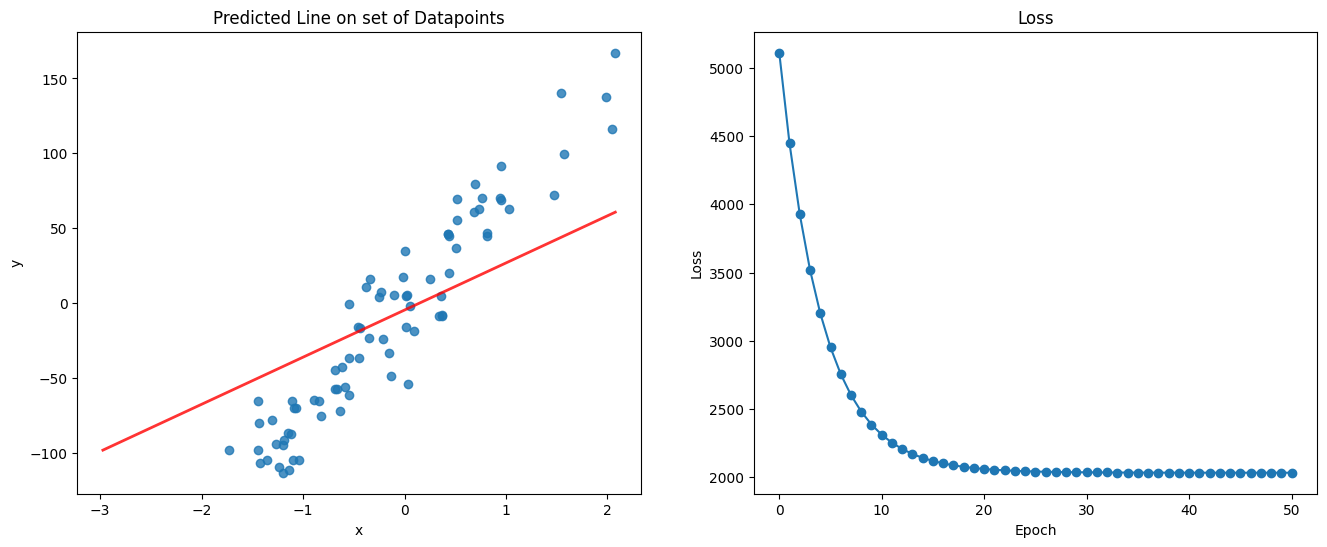

Epoch:  60
Loss =  2033.1224666056237


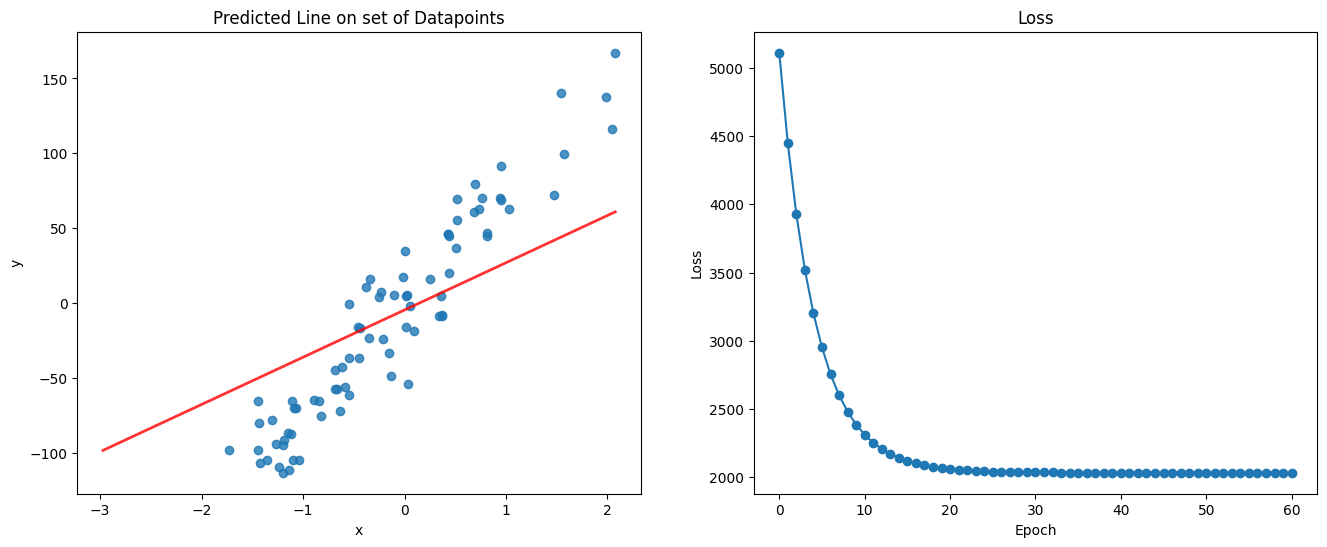

Epoch:  70
Loss =  2033.1166547779553


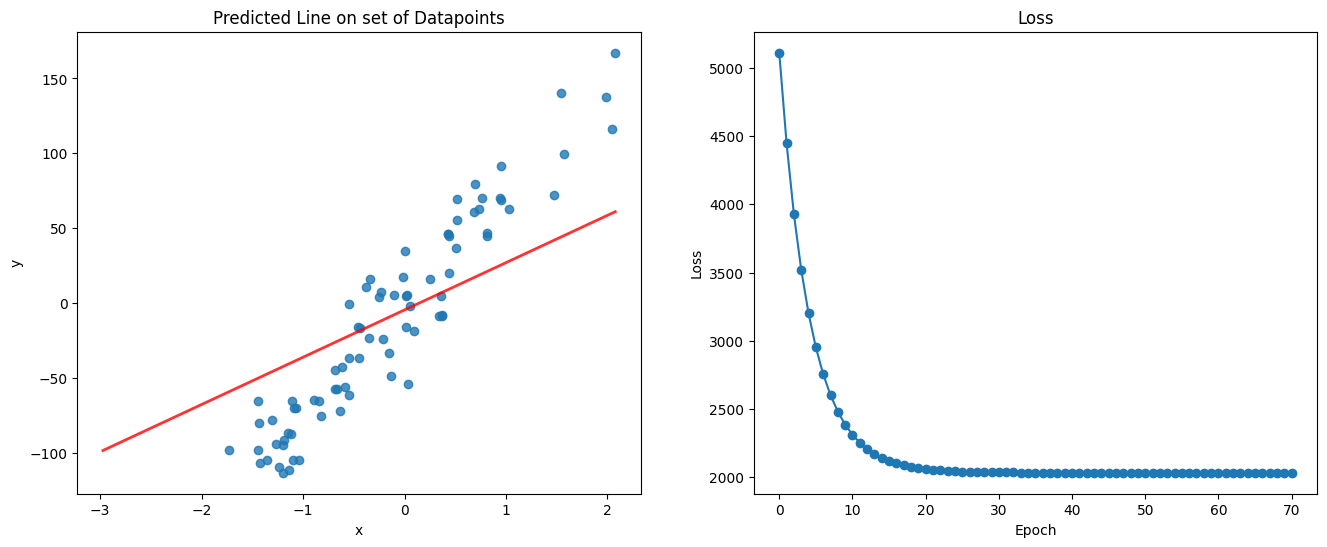

Epoch:  80
Loss =  2033.115792691137


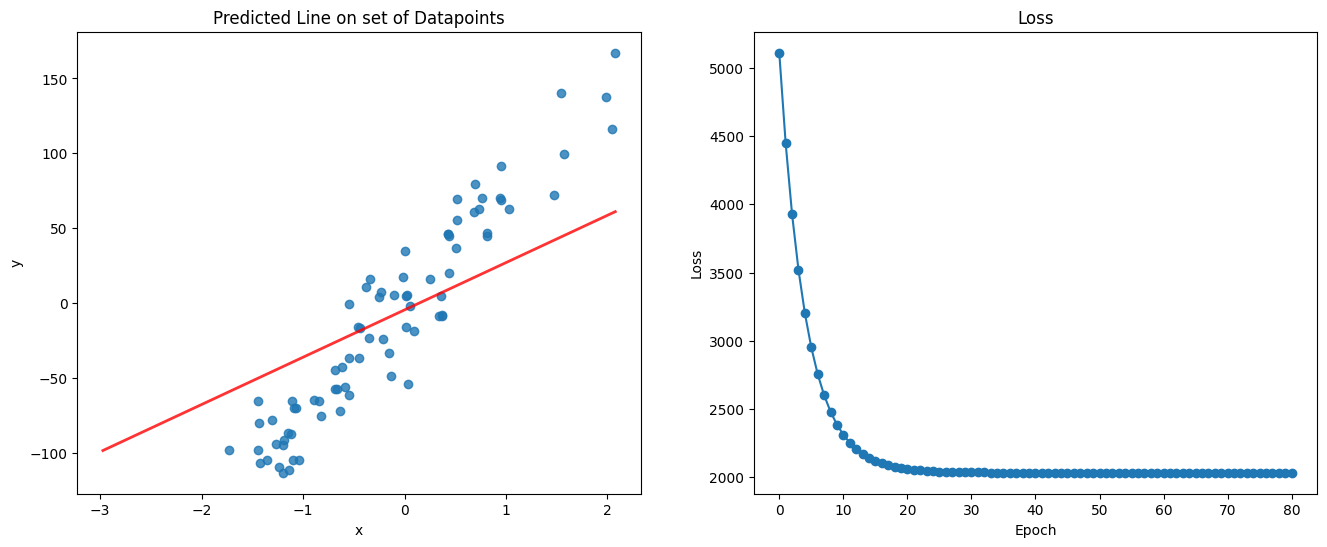

Epoch:  90
Loss =  2033.1156613671992


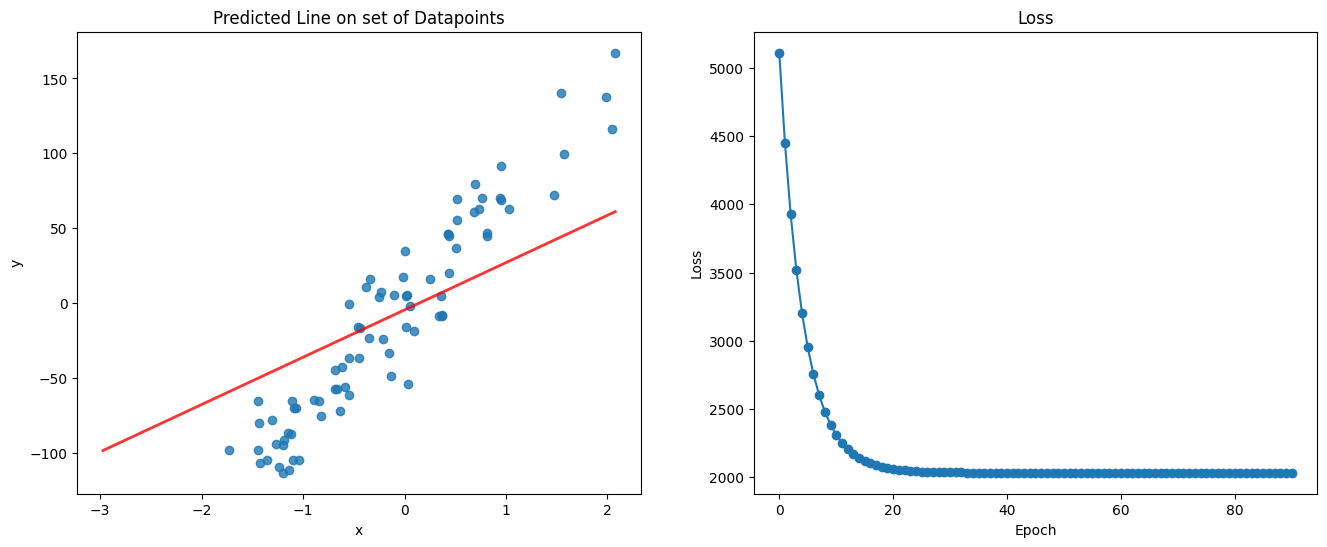

Epoch:  100
Loss =  2033.115641068914


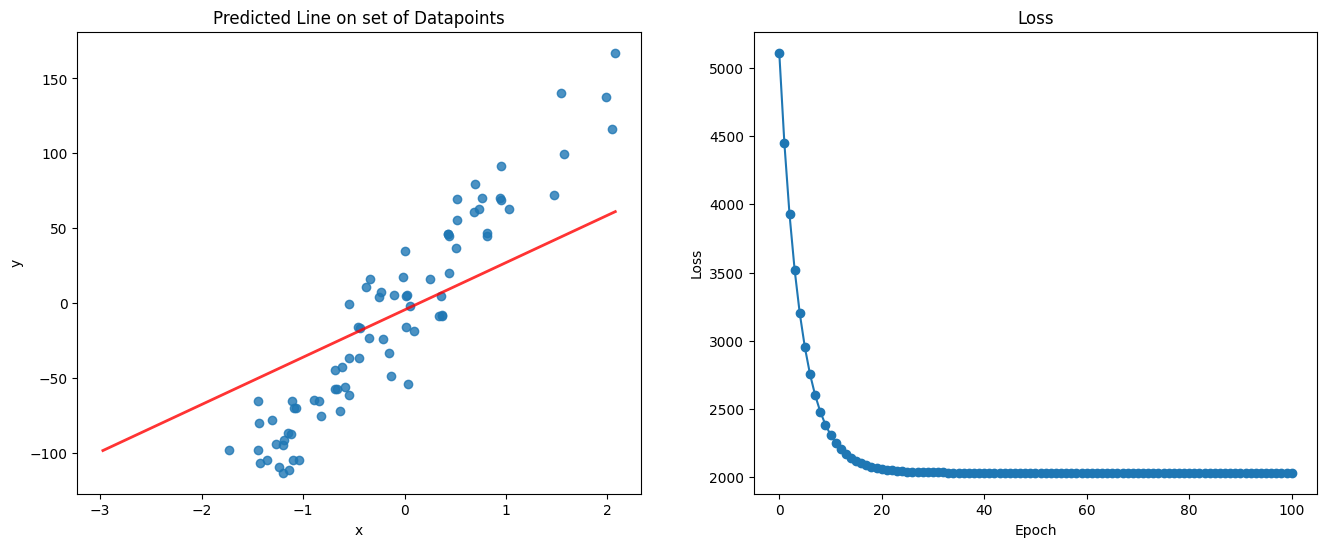

Epoch:  110
Loss =  2033.115637907174


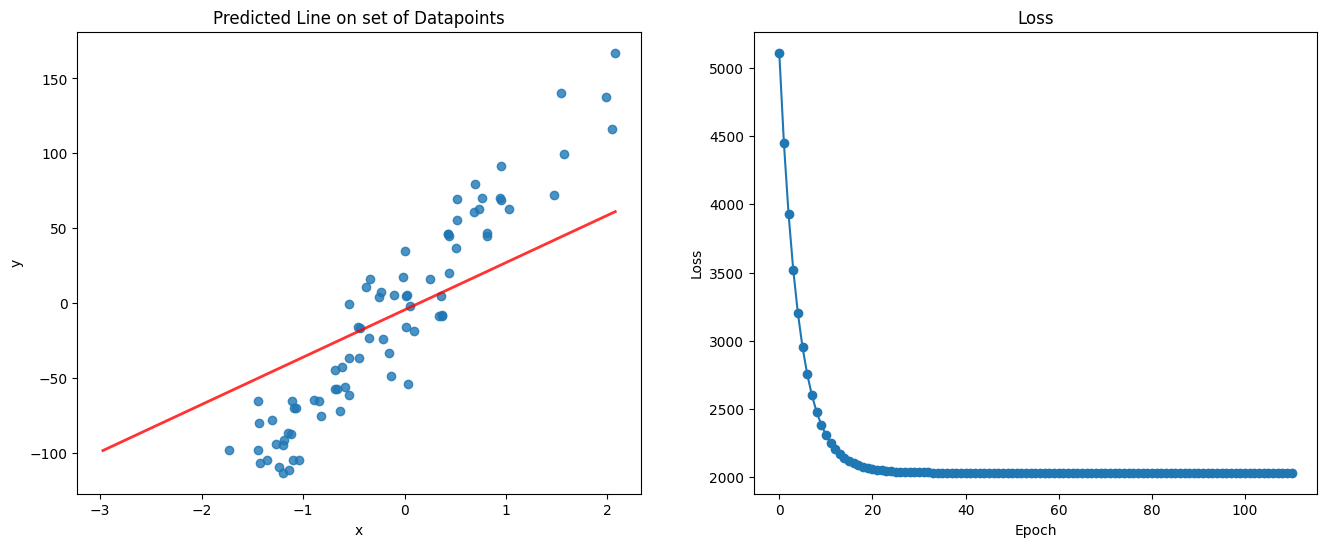

Epoch:  120
Loss =  2033.1156374127052


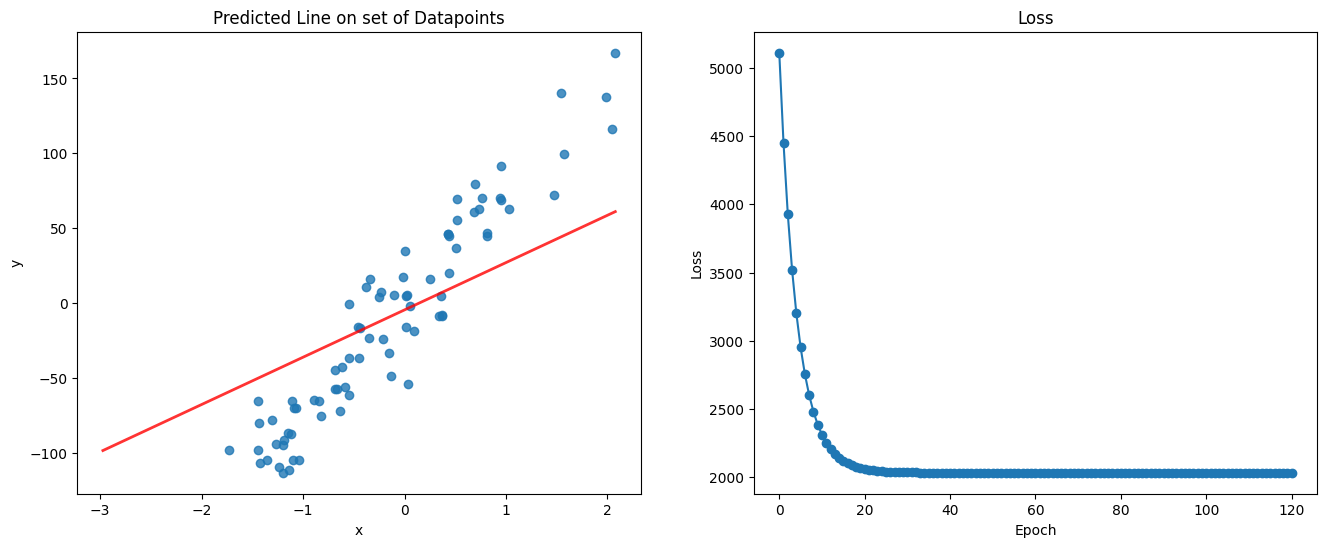

Epoch:  130
Loss =  2033.1156373352128


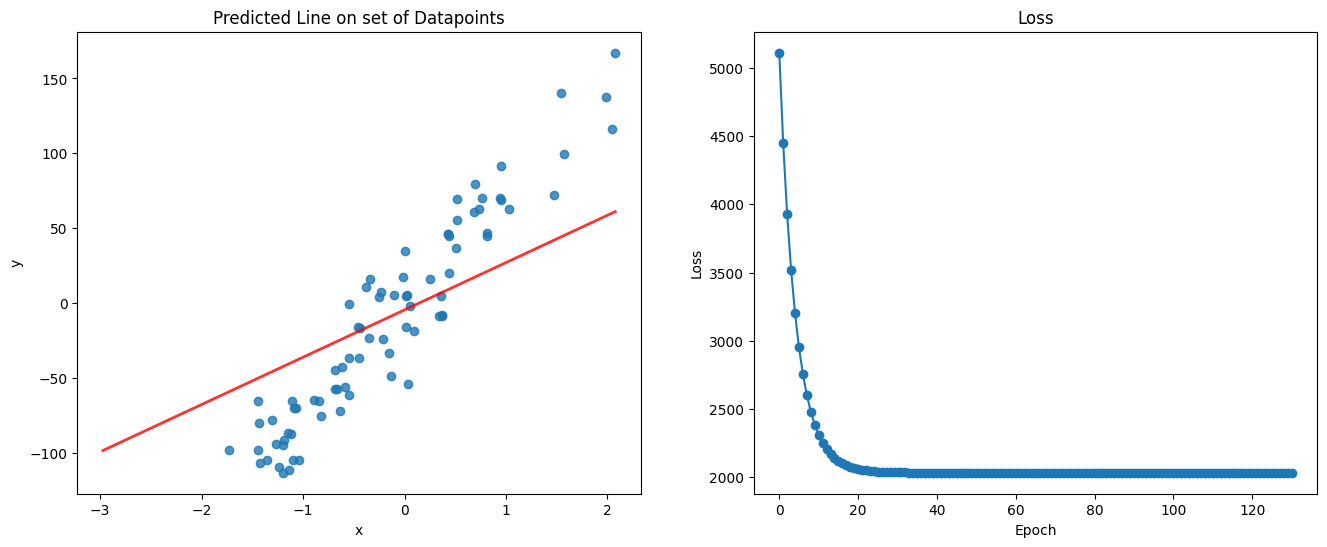

Epoch:  140
Loss =  2033.1156373230558


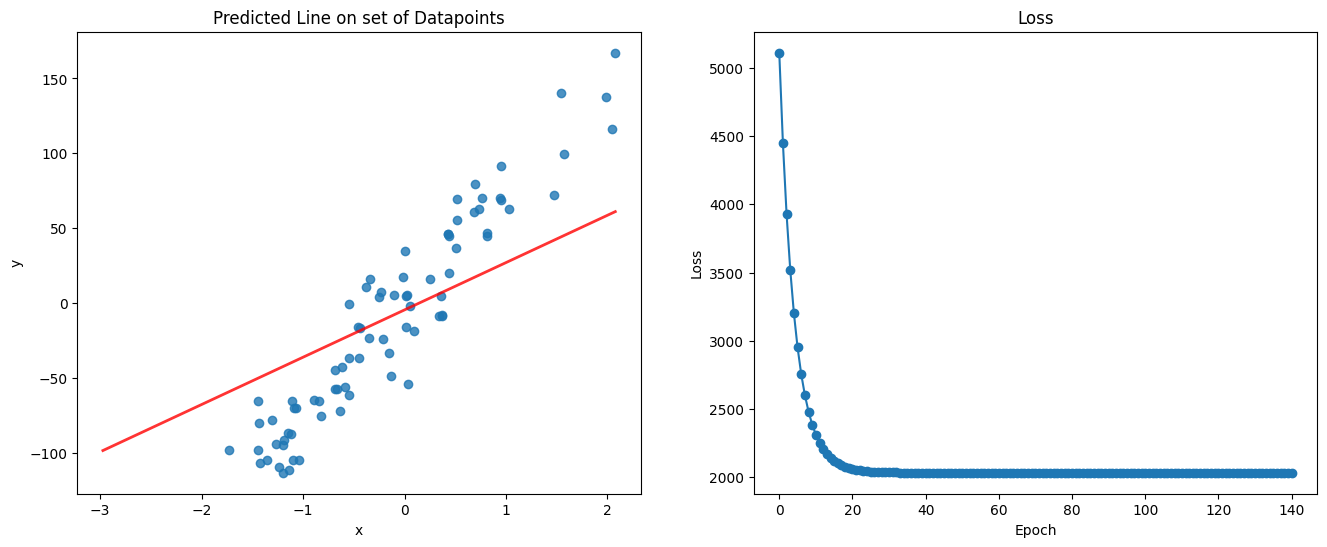

Epoch:  150
Loss =  2033.1156373211477


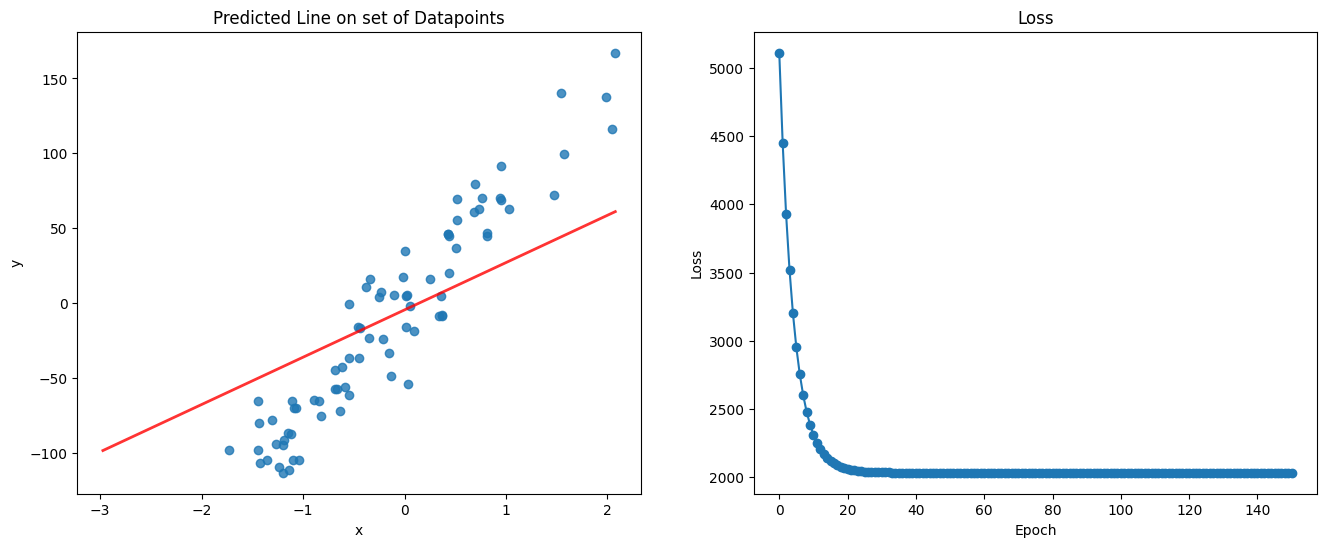

Epoch:  160
Loss =  2033.1156373208487


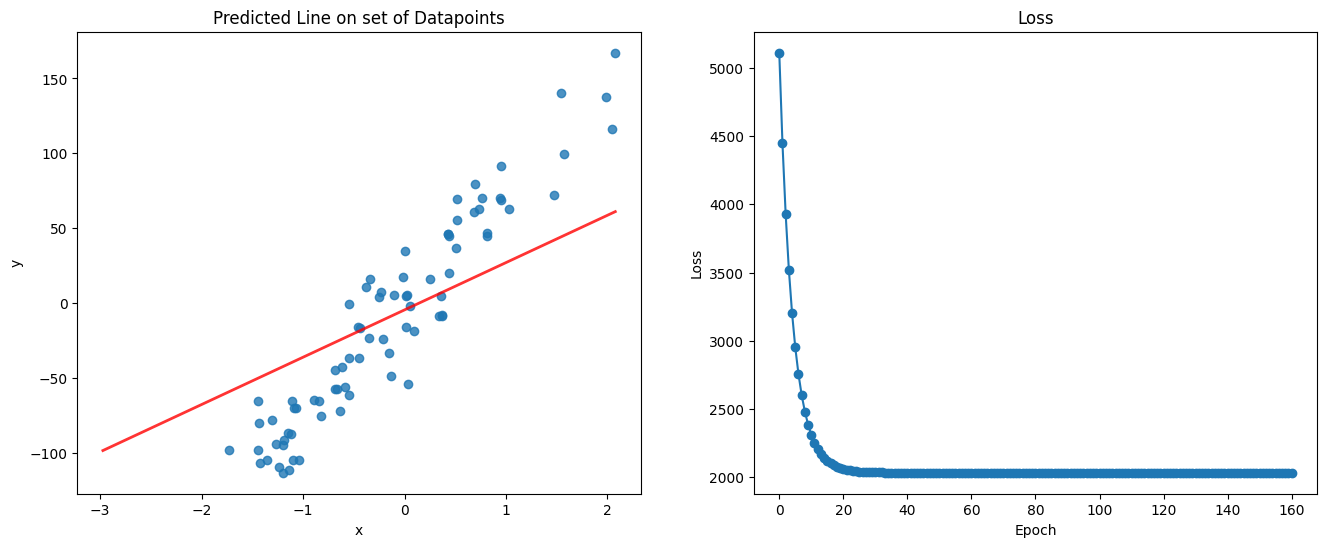

Epoch:  170
Loss =  2033.1156373208019


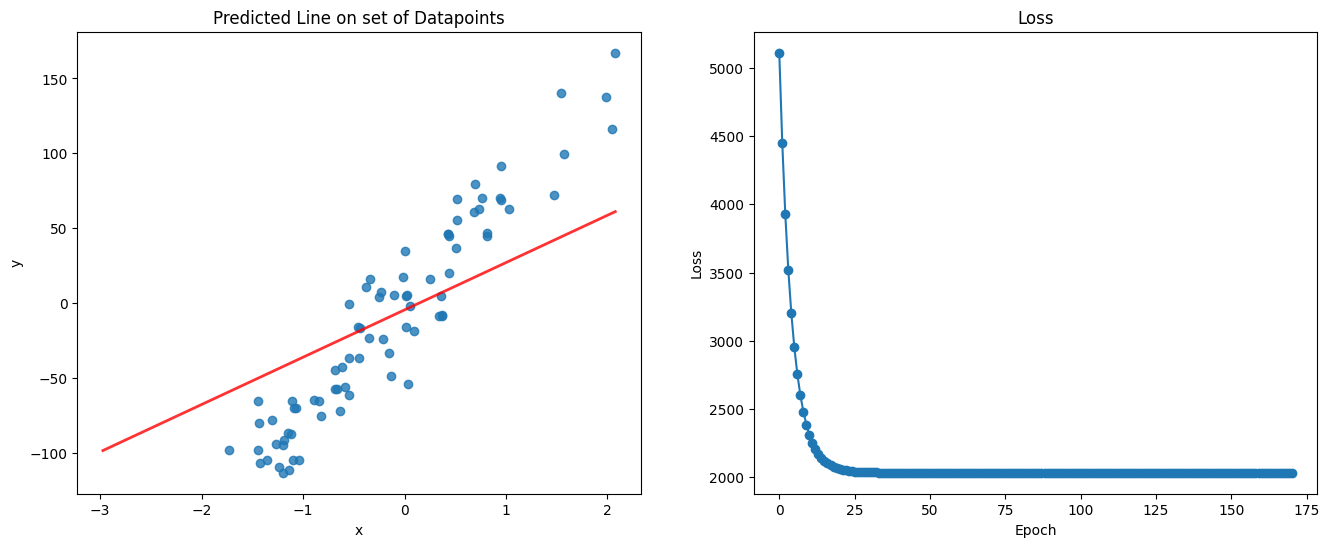

Epoch:  180
Loss =  2033.1156373207946


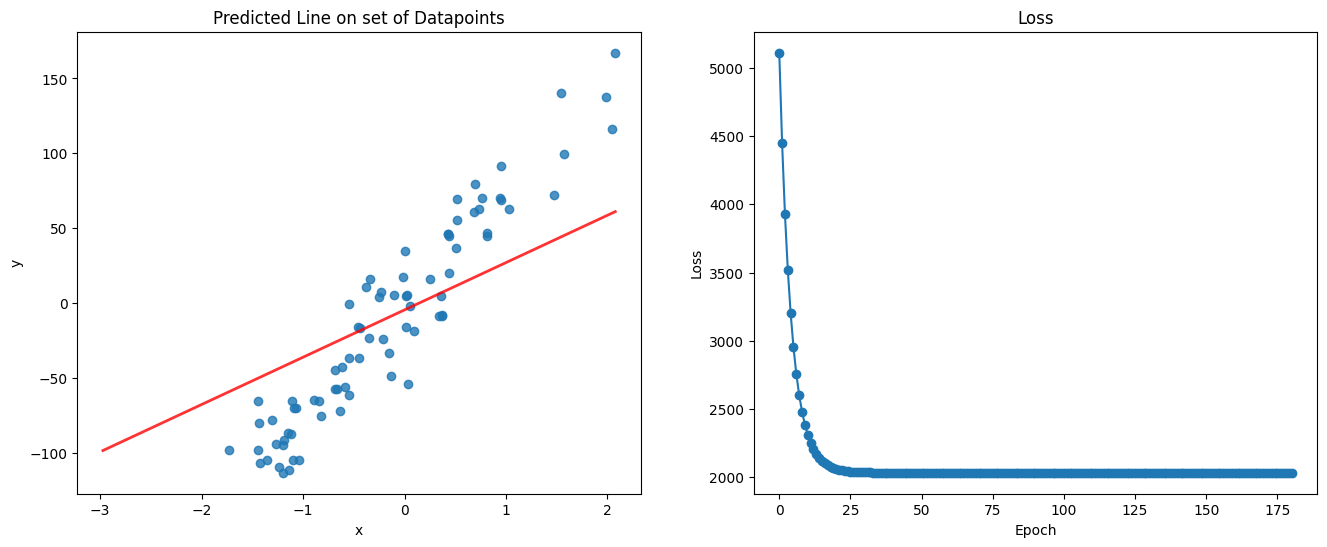

Epoch:  190
Loss =  2033.1156373207923


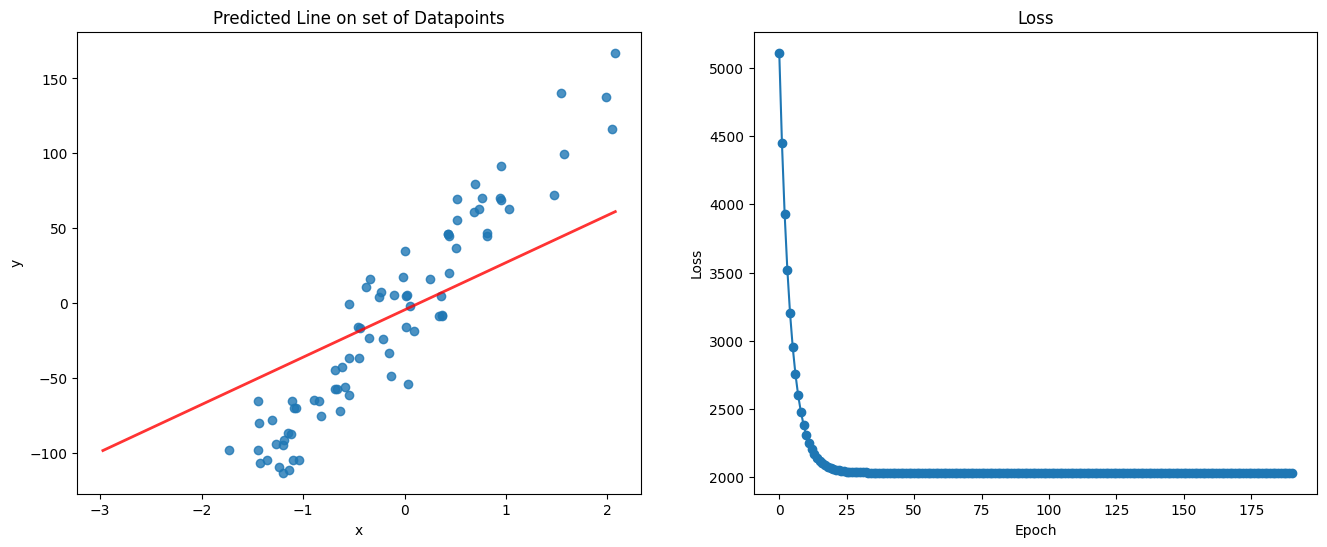

Epoch:  200
Loss =  2033.1156373207916


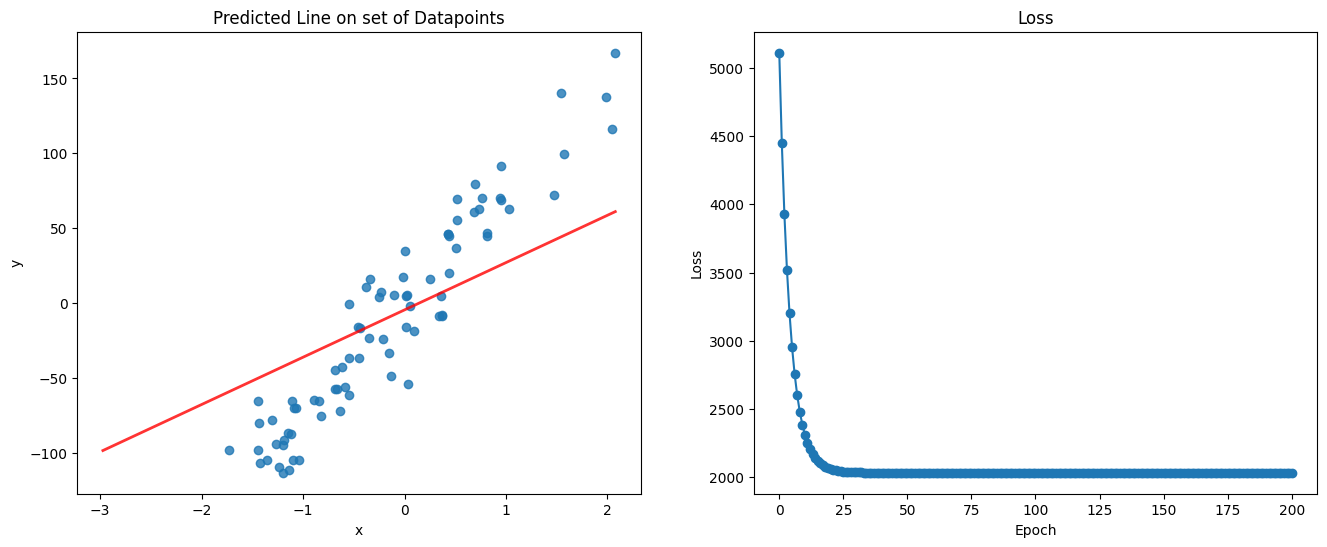

Epoch:  210
Loss =  2033.1156373207912


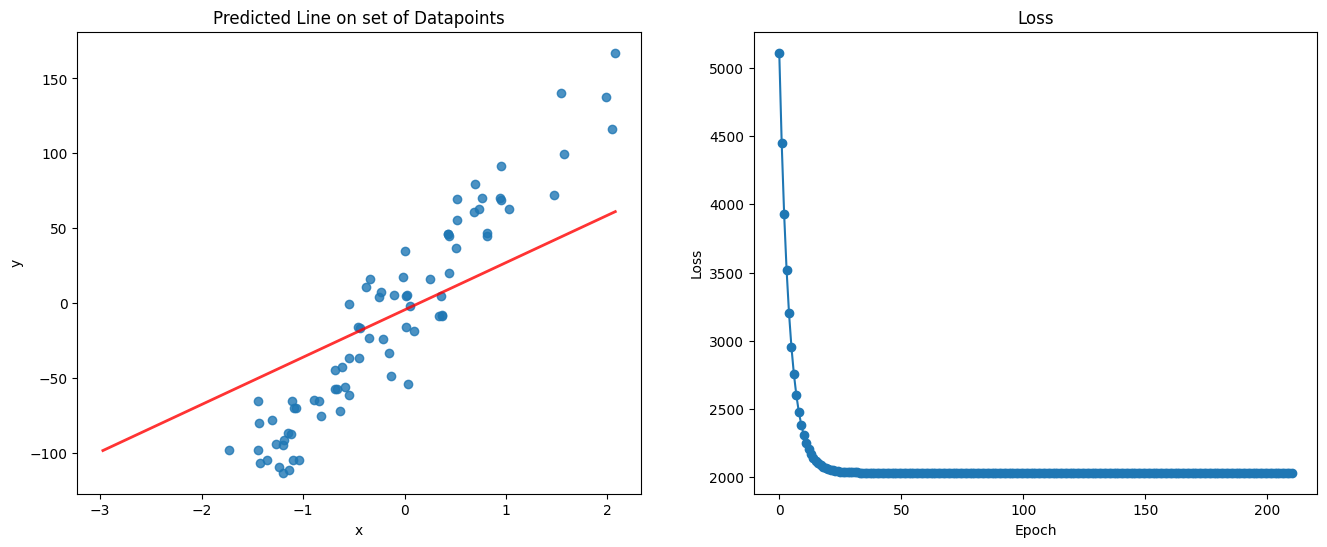

Epoch:  220
Loss =  2033.1156373207916


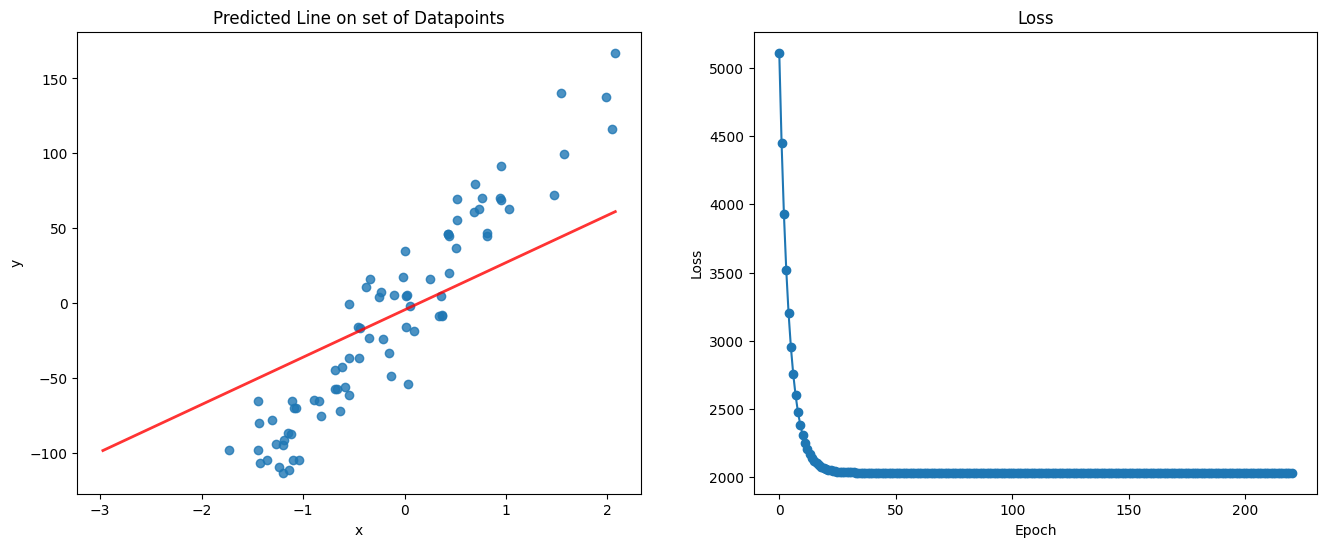

Epoch:  230
Loss =  2033.1156373207912


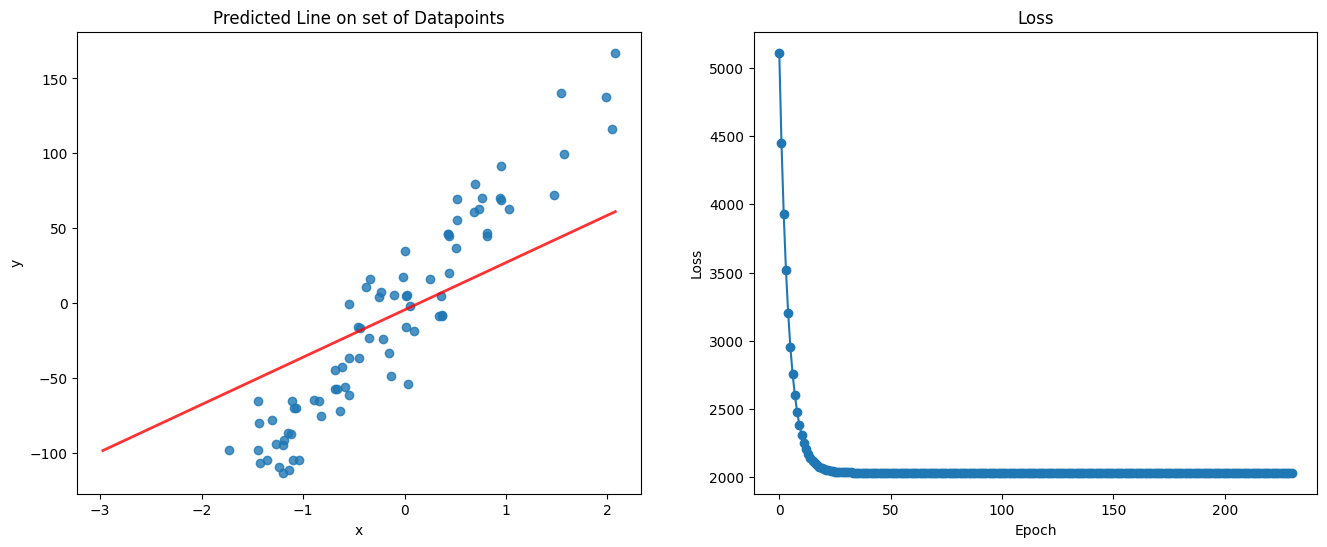

Epoch:  240
Loss =  2033.1156373207916


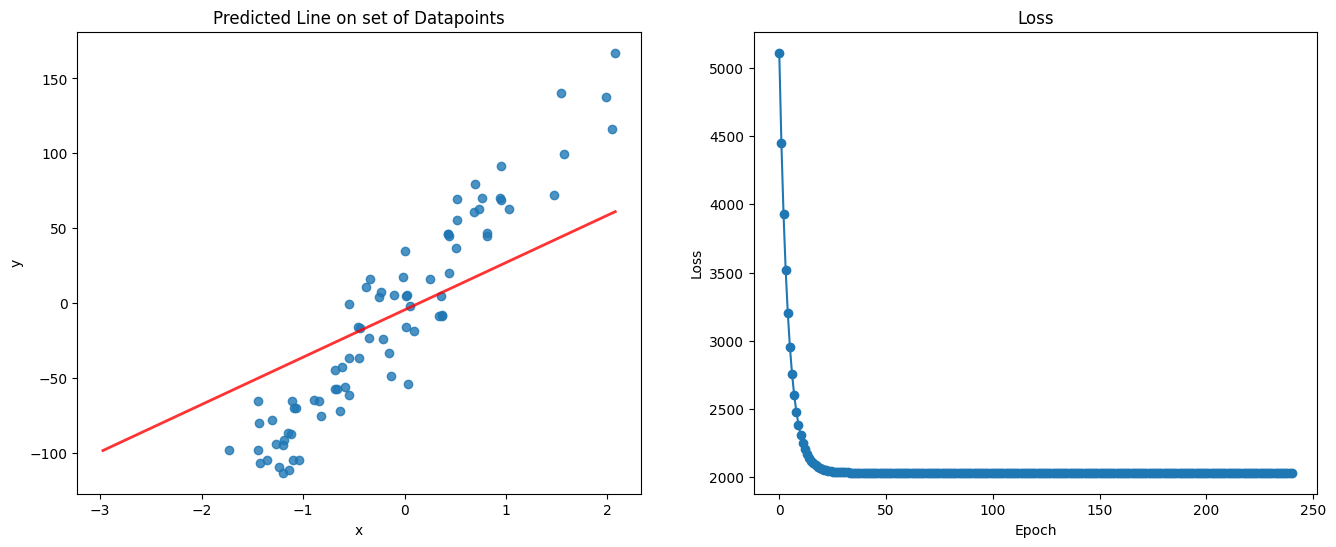

Epoch:  250
Loss =  2033.1156373207912


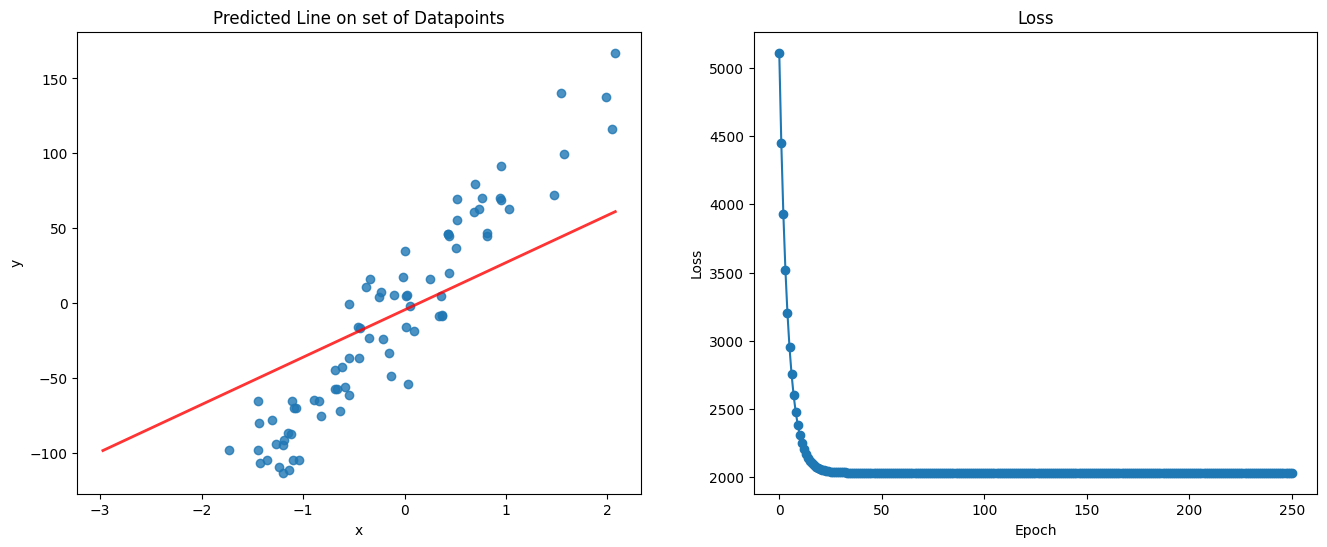

Epoch:  260
Loss =  2033.1156373207923


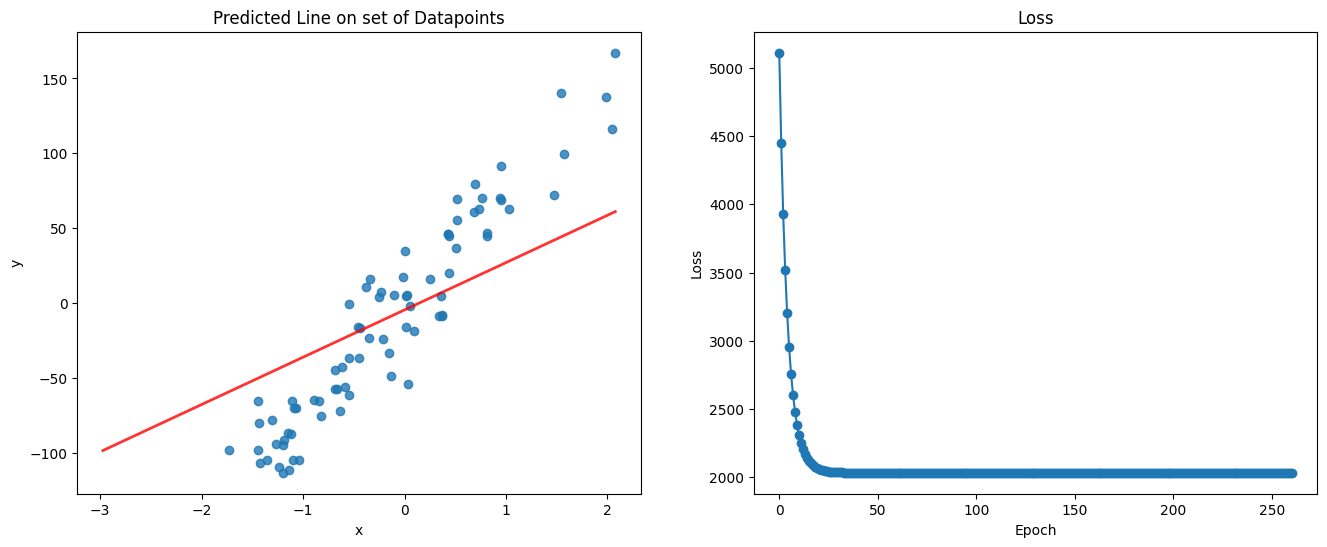

Epoch:  270
Loss =  2033.1156373207923


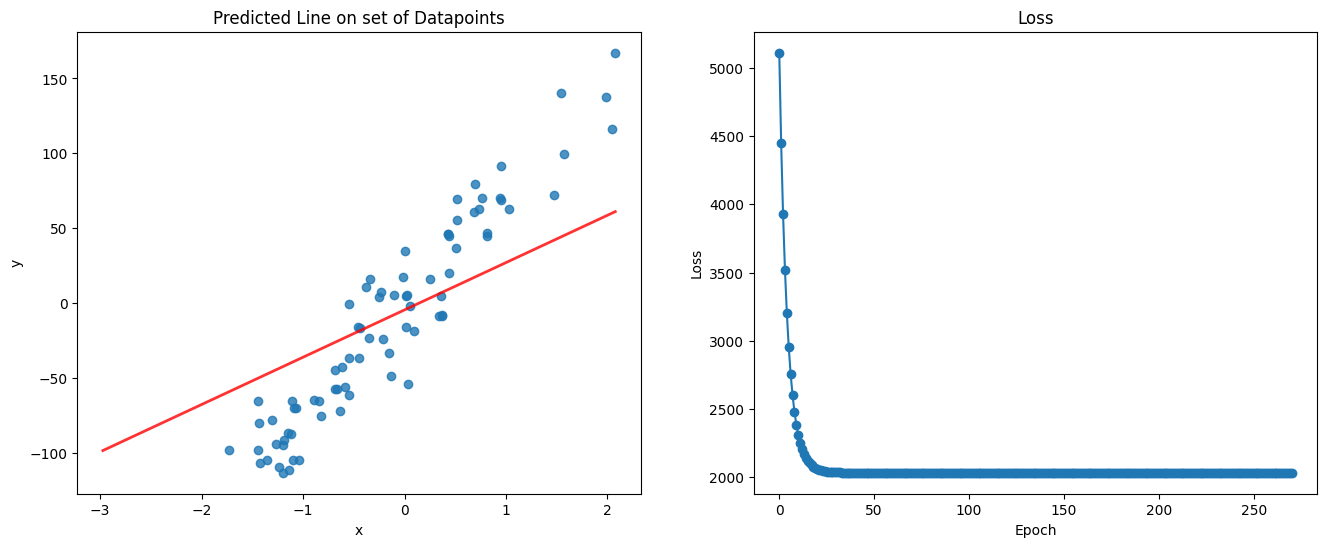

Epoch:  280
Loss =  2033.1156373207923


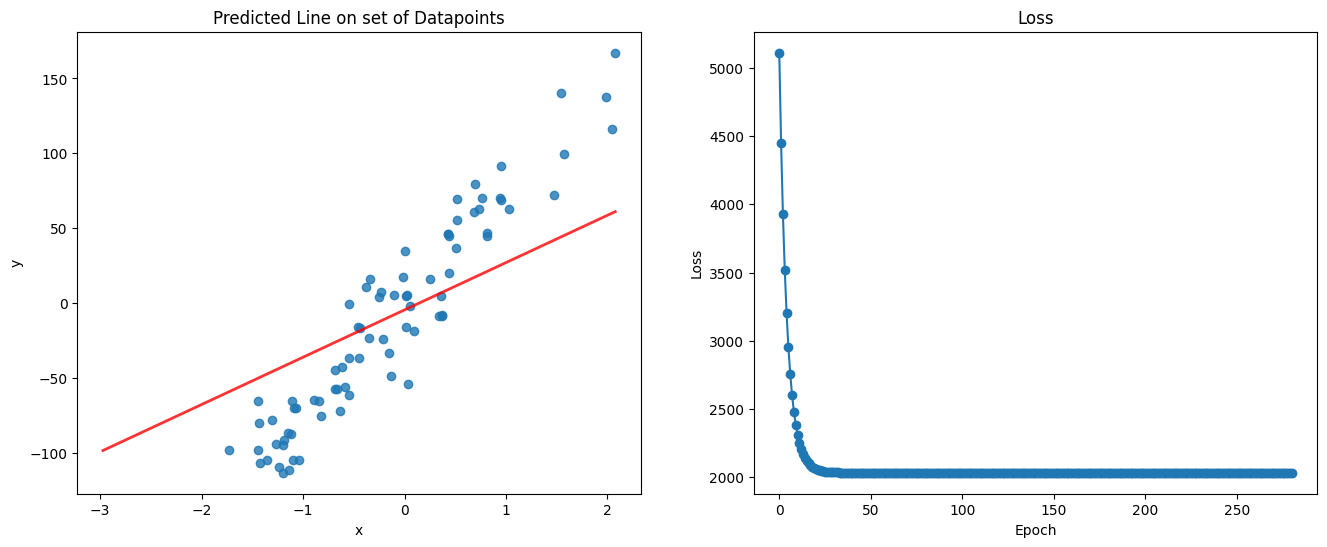

Epoch:  290
Loss =  2033.1156373207928


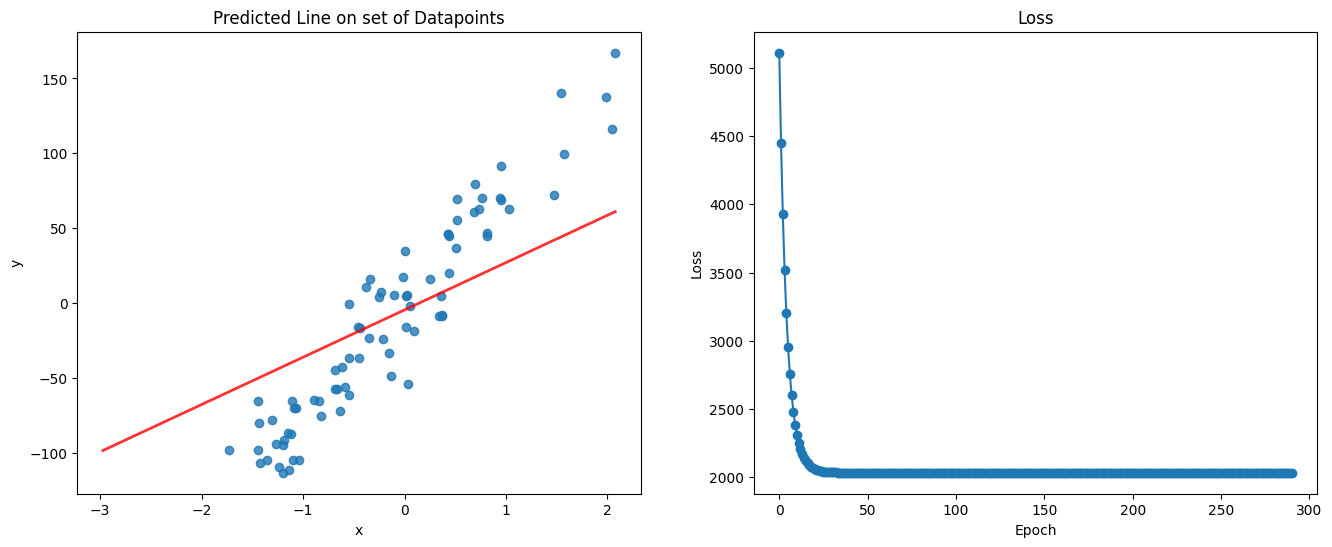

In [212]:
# 2. Pakeiskite parametrus - mokymosi greiti, epochų skaičių, nepriklausomų kintamųjų skaičių,
# pradinių duomenų pasiskirstymą.

# Sample size
M = 100

# No. of input features
n = 2

# Learning Rate - Define during explanation
l_r = 0.05

# Number of iterations for updates - Define during explanation
epochs = 300

X, y = make_regression(n_samples=M, n_features=n, n_informative=n, n_targets=1, random_state=100, noise=1)
y = np.reshape(y,(y.size, 1))

train_and_show(X, y, epochs, l_r)

In [208]:
# 3. Nustatykite, kokia nuostolių funkcija naudojama?

# Ats.: MSE

In [214]:
# 4. Kodėl atnaujinant parametro  b reikšmę nedauginame iš X_train?

# Ats.: Nes 'b' yra laisvas kintamasis ir jo reikšmė tiesiogiai nedauginama su 'xi' reikšme

Epoch:  0
Loss =  31.87688937887143


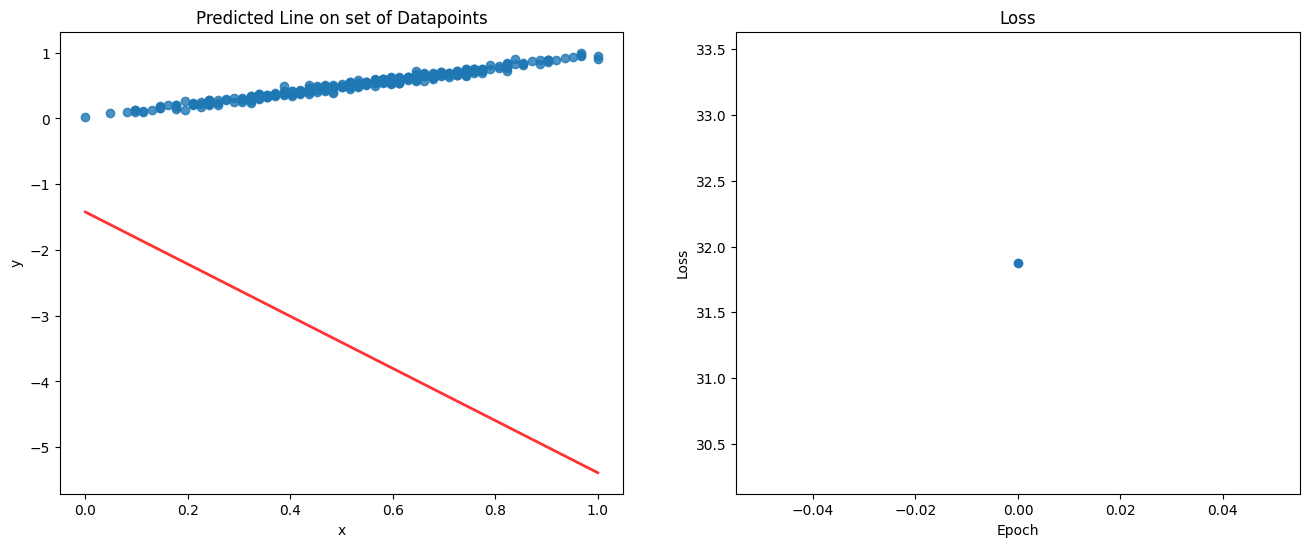

Epoch:  200
Loss =  0.03017754359223175


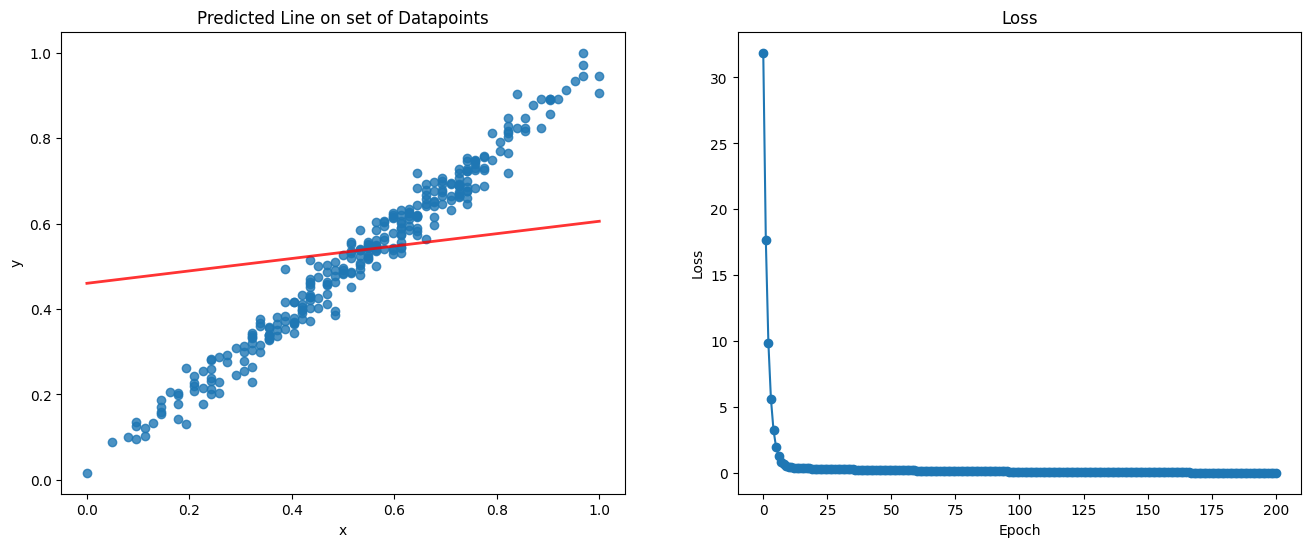

Epoch:  400
Loss =  0.0029373331436930022


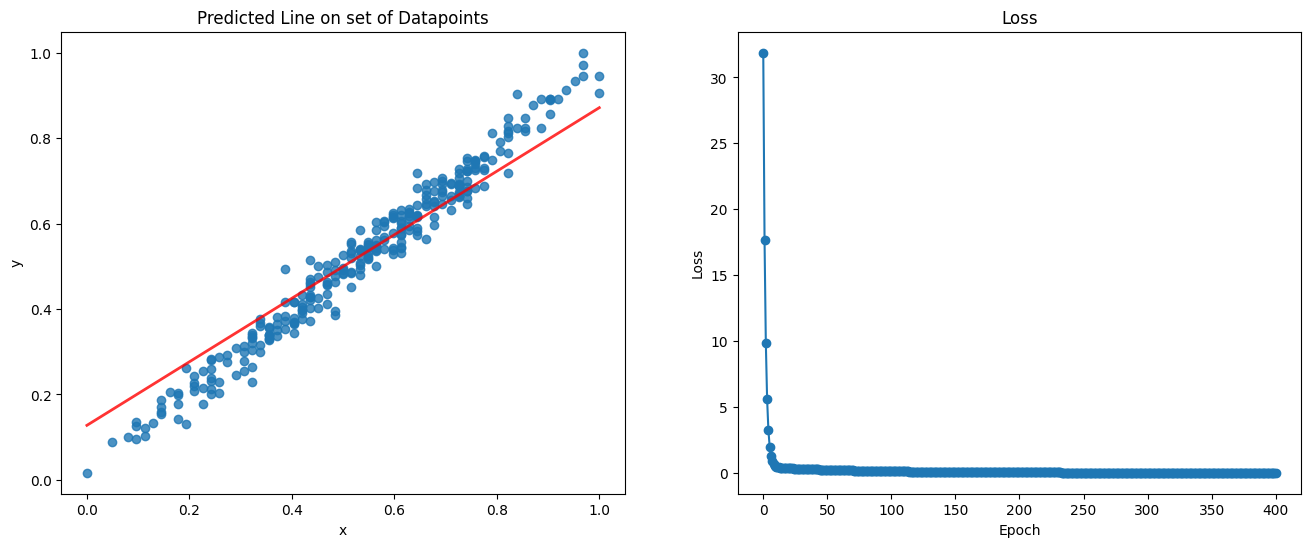

Epoch:  600
Loss =  0.001158735725441222


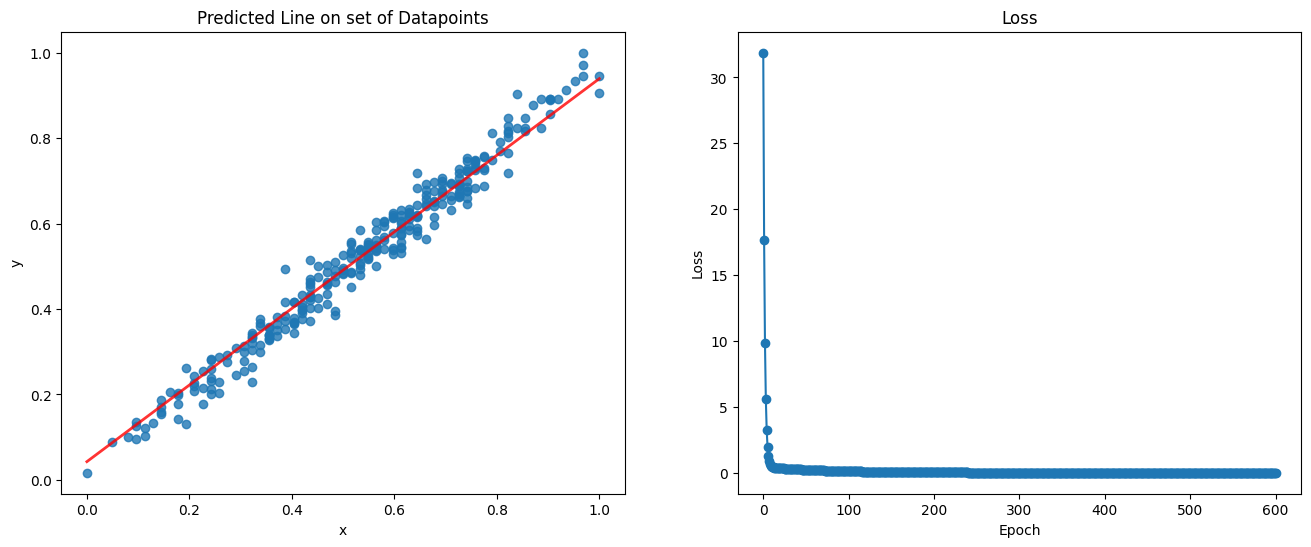

In [225]:
# 5. Raskite realaus pasaulio duomenų rinkinį su tiesine priklausomybe ir pritaikykite šį modelį.

def prepare_number_list(numbers):
    return np.array(list(map(lambda value: [float(value)], numbers)))

def normalize_column(column):
    min_value = min(column)
    max_value = max(column)

    return map(lambda x: map_value(float(x), min_value, max_value, 0, 1), column)

df = pd.read_csv('assets/Ice Cream Sales - temperatures.csv')
X = prepare_number_list(normalize_column(df['Temperature'].values))
y = prepare_number_list(normalize_column(df['Ice Cream Profits'].values))

train_and_show(X, y, 800, 0.1, 200)

Epoch:  0
Loss =  404.76144508093915


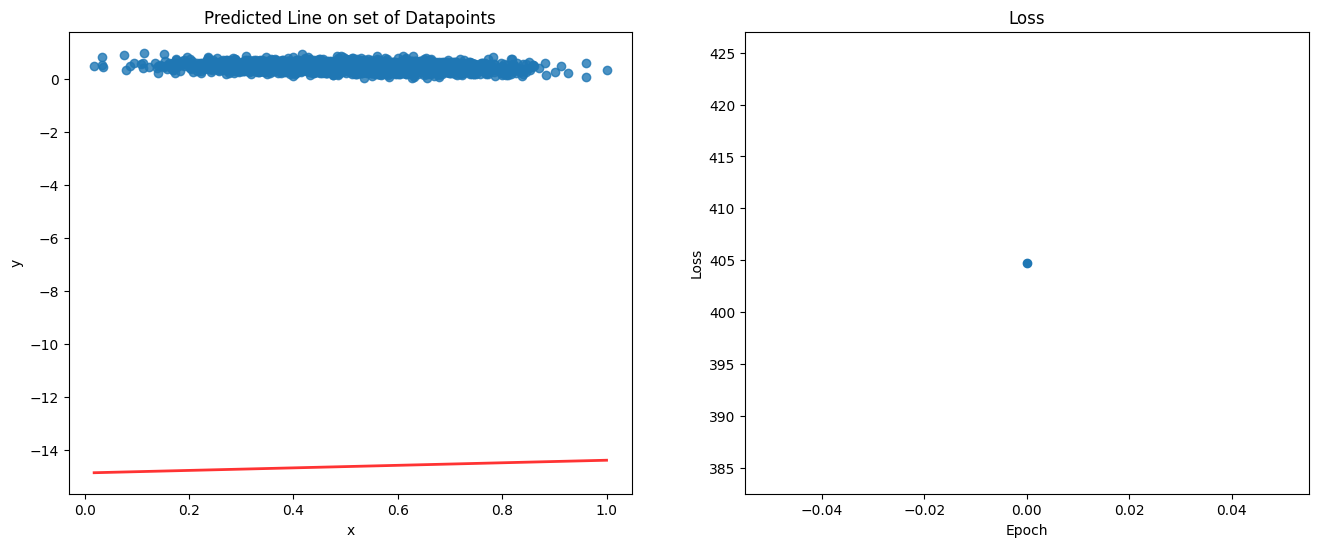

Epoch:  200
Loss =  0.2645986409673728


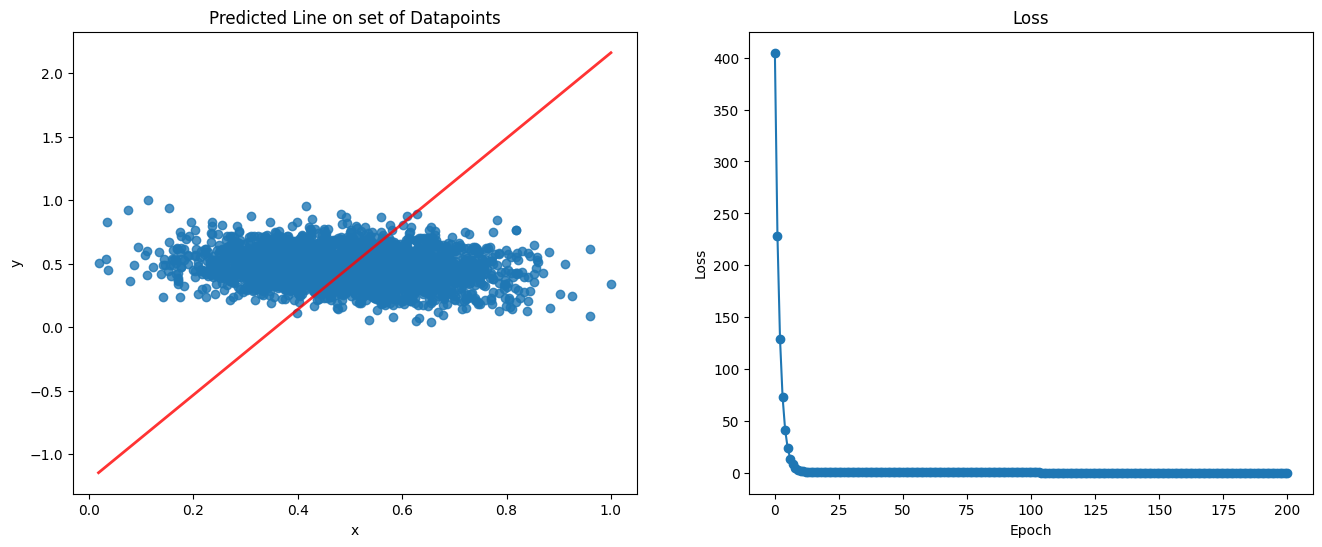

Epoch:  400
Loss =  0.08472563651985762


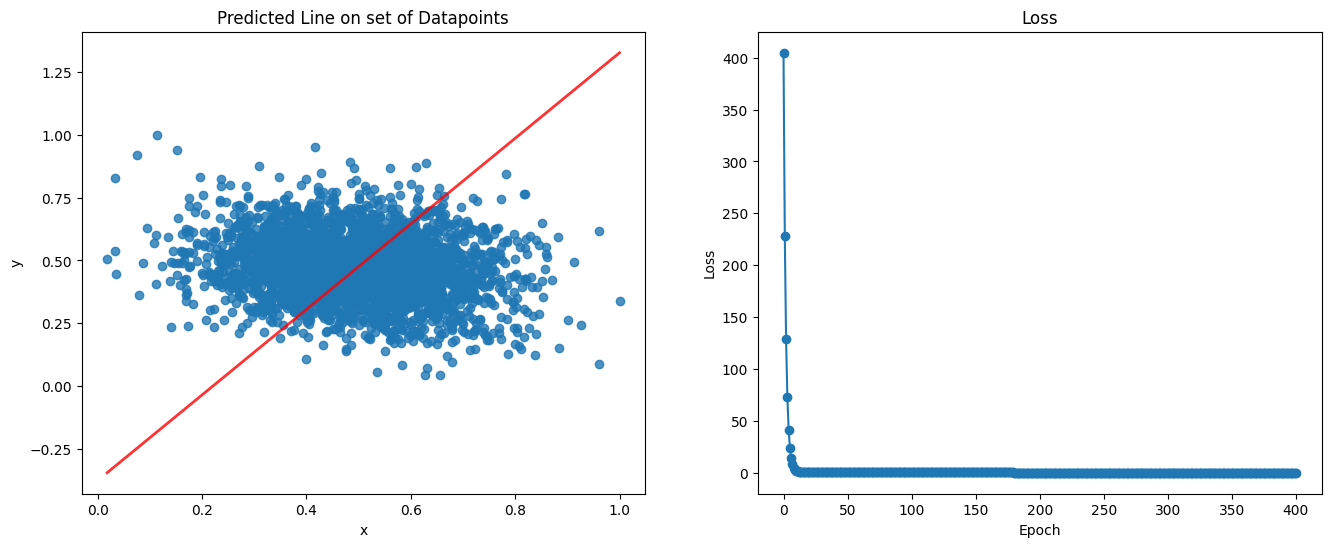

Epoch:  600
Loss =  0.03461215467939087


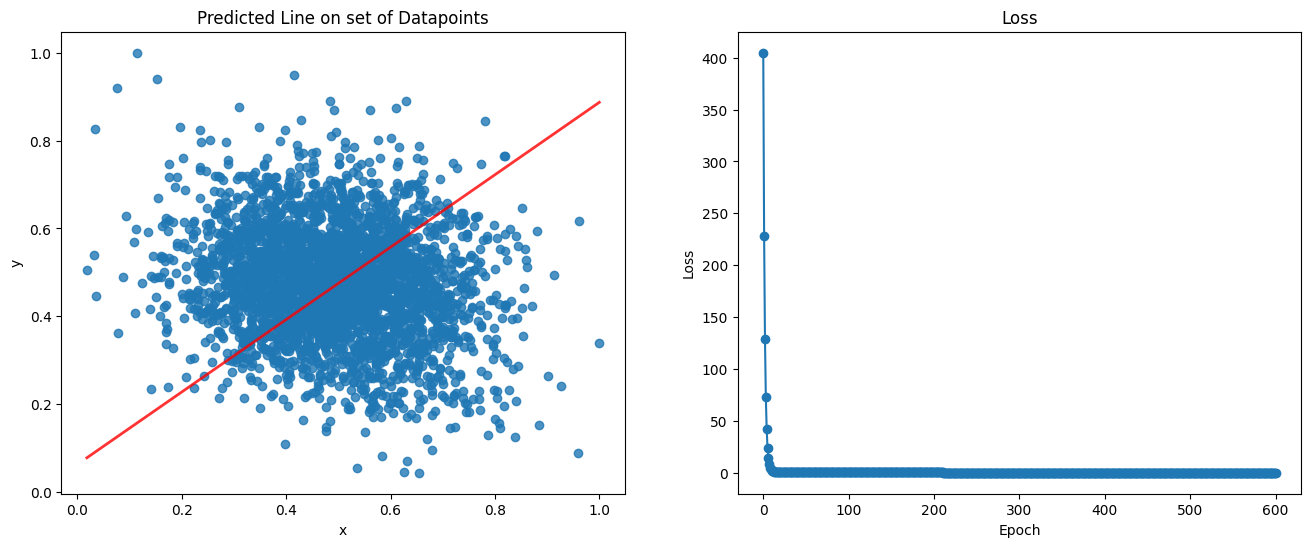

Epoch:  800
Loss =  0.020650298258031264


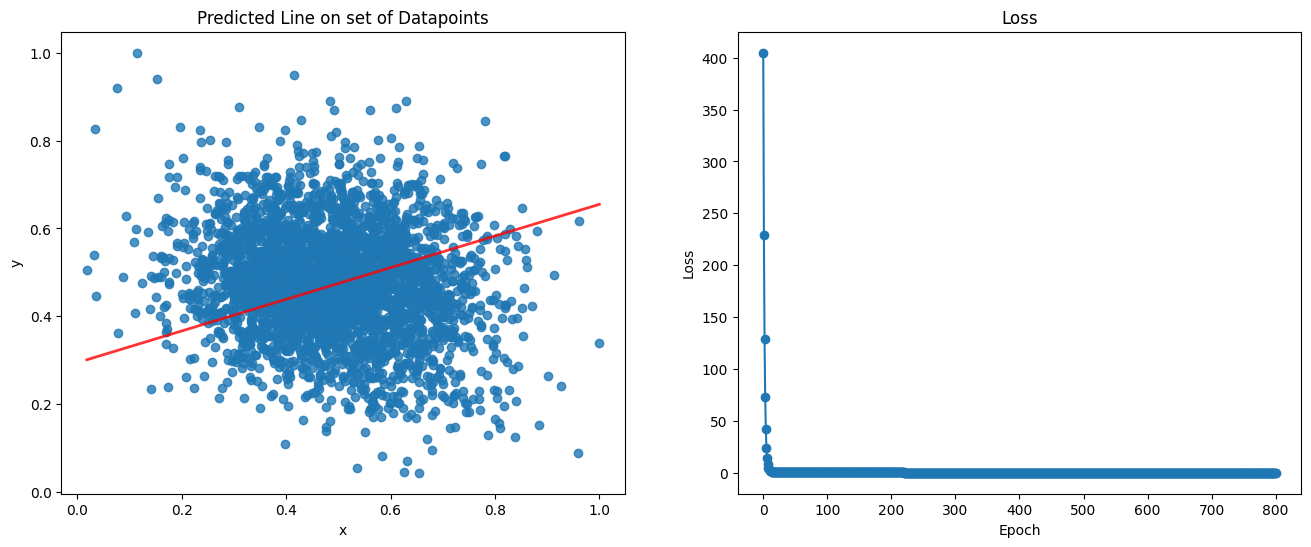

Epoch:  1000
Loss =  0.016760458087850726


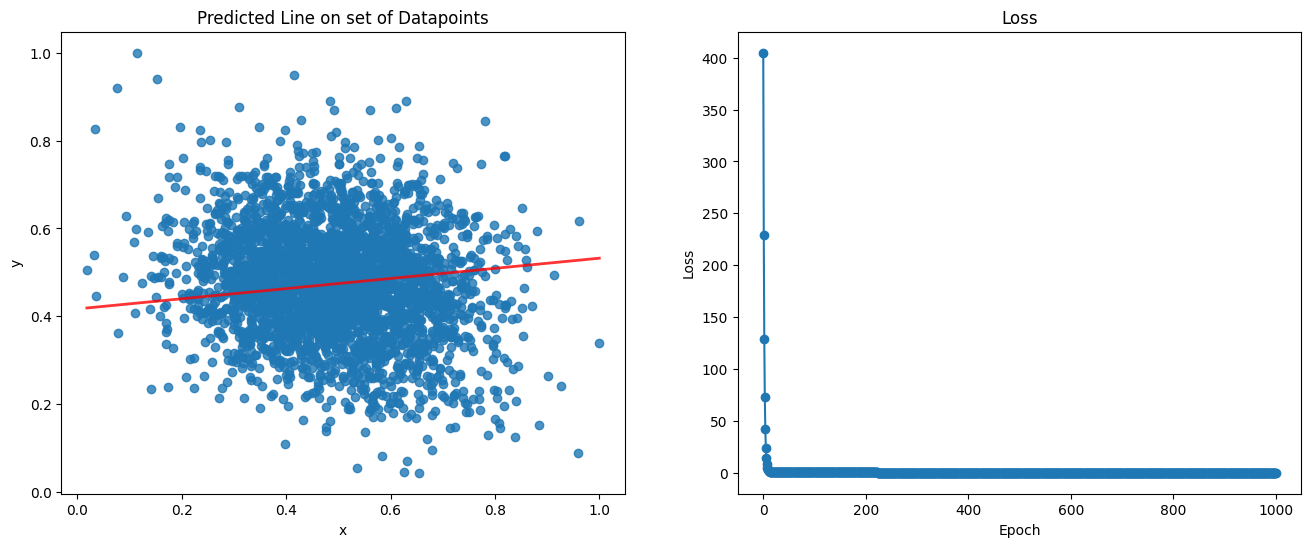

In [228]:
# 6. Raskite arba sugeneruoti duomenų rinkinį su netiesine priklausomybe ir pritaikyti šį modelį.

def prepare_number_list(numbers):
    return np.array(list(map(lambda value: [float(value)], numbers)))

def normalize_column(column):
    min_value = min(column)
    max_value = max(column)

    return map(lambda x: map_value(float(x), min_value, max_value, 0, 1), column)

df = pd.read_csv('assets/apple_quality.csv')
X = prepare_number_list(normalize_column(df['Size'].values))
y = prepare_number_list(normalize_column(df['Weight'].values))

train_and_show(X, y, 1001, 0.1, 200)


# Lab23

In [397]:
# Main

def relu(Z):
    return np.maximum(0, Z)

def sigmoid(Z):
    return 1/(1+np.exp(-Z))

def sigmoid_backward(dA, Z):
    sig = sigmoid(Z)
    return dA * sig * (1 - sig)

def relu_backward(dA, Z):
    dZ = np.array(dA, copy = True)
    dZ[Z <= 0] = 0;
    return dZ;

@dataclass
class NeuralNetworkLayer:
    weights: np.array
    bias: np.array
    activation: Literal["relu", "sigmoid"]

    def get_activation_func(self):
        if self.activation == "relu":
            return relu
        elif self.activation == "sigmoid":
            return sigmoid
        else:
            raise Exception(f"Non-supported activation function: '{self.activation}'")

    def get_backward_activation_func(self):
        if self.activation == "relu":
            return relu_backward
        elif self.activation == "sigmoid":
            return sigmoid_backward
        else:
            raise Exception(f"Non-supported activation function: '{self.activation}'")

@dataclass
class NeuralNetwork:
    layers: list[NeuralNetworkLayer]

def init_network(architecture, seed=1):
    np.random.seed(seed)

    layers = []
    for i in range(len(architecture) - 1):
        layer_input_size = architecture[i]["size"]
        layer_output_size = architecture[i+1]["size"]

        layers.append(NeuralNetworkLayer(
            np.random.randn(layer_output_size, layer_input_size) * 0.1,
            np.random.randn(layer_output_size, 1) * 0.1,
            architecture[i+1]["activation"]
        ))

    return NeuralNetwork(layers)

def single_layer_forward_propagation(A_prev, W_curr, b_curr, activation_func):
    Z_curr = np.dot(W_curr, A_prev) + b_curr

    return activation_func(Z_curr), Z_curr

def get_cost_value(Y_hat, Y):
    # number of examples
    m = Y_hat.shape[1]
    # calculation of the cost according to the formula
    cost = -1 / m * (np.dot(Y, np.log(Y_hat).T) + np.dot(1 - Y, np.log(1 - Y_hat).T))
    return np.squeeze(cost)

def convert_prob_into_class(probs):
    probs_ = np.copy(probs)
    probs_[probs_ > 0.5] = 1
    probs_[probs_ <= 0.5] = 0
    return probs_

def get_accuracy_value(Y_hat, Y):
    Y_hat_ = convert_prob_into_class(Y_hat)
    return (Y_hat_ == Y).all(axis=0).mean()

def full_forward_propagation(X, network: NeuralNetwork):
    A_values = {}
    Z_values = {}

    A_curr = X
    for idx, layer in enumerate(network.layers):
        A_prev = A_curr

        W_curr = layer.weights
        b_curr = layer.bias
        A_curr, Z_curr = single_layer_forward_propagation(A_prev, W_curr, b_curr, layer.get_activation_func())

        A_values[idx - 1] = A_prev
        Z_values[idx] = Z_curr

    return A_curr, A_values, Z_values

def single_layer_backward_propagation(dA_curr, W_curr, b_curr, Z_curr, A_prev, backward_activation_func):
    # number of examples
    m = A_prev.shape[1]

    # calculation of the activation function derivative
    dZ_curr = backward_activation_func(dA_curr, Z_curr)

    # derivative of the matrix W
    dW_curr = np.dot(dZ_curr, A_prev.T) / m
    # derivative of the vector b
    db_curr = np.sum(dZ_curr, axis=1, keepdims=True) / m
    # derivative of the matrix A_prev
    dA_prev = np.dot(W_curr.T, dZ_curr)

    return dA_prev, dW_curr, db_curr

def full_backward_propagation(Y_hat, Y, A_values, Z_values, network: NeuralNetwork):
    dW = {}
    db = {}

    # number of examples
    m = Y.shape[1]
    # a hack ensuring the same shape of the prediction vector and labels vector
    Y = Y.reshape(Y_hat.shape)

    # initiation of gradient descent algorithm
    dA_prev = -(np.divide(Y, Y_hat) - np.divide(1 - Y, 1 - Y_hat))

    for layer_idx_curr, layer in reversed(list(enumerate(network.layers))):
        layer_idx_prev = layer_idx_curr - 1

        activation_func = layer.get_backward_activation_func()

        dA_curr = dA_prev

        A_prev = A_values[layer_idx_prev]
        Z_curr = Z_values[layer_idx_curr]

        W_curr = layer.weights
        b_curr = layer.bias

        dA_prev, dW_curr, db_curr = single_layer_backward_propagation(dA_curr, W_curr, b_curr, Z_curr, A_prev, activation_func)

        dW[layer_idx_curr] = dW_curr
        db[layer_idx_curr] = db_curr

    return dW, db

def update_network(network: NeuralNetwork, dW, db, learning_rate):
    for layer_idx, layer in enumerate(network.layers, 0):
        layer.weights -= learning_rate * dW[layer_idx]
        layer.bias    -= learning_rate * db[layer_idx]

def train(X_train, Y_train, network: NeuralNetwork, epochs, learning_rate, verbose=False, callback=None):
    cost_history = []
    accuracy_history = []

    for i in range(epochs):
        Y_hat, A_values, Z_values = full_forward_propagation(X_train, network)

        # calculating metrics and saving them in history
        cost = get_cost_value(Y_hat, Y_train)
        cost_history.append(cost)
        accuracy = get_accuracy_value(Y_hat, Y_train)
        accuracy_history.append(accuracy)

        # step backward - calculating gradient
        dW, db = full_backward_propagation(Y_hat, Y_train, A_values, Z_values, network)
        # updating model state
        update_network(network, dW, db, learning_rate)

        if(i % 50 == 0):
            if(verbose):
                print("Iteration: {:05} - cost: {:.5f} - accuracy: {:.5f}".format(i, cost, accuracy))
            if(callback is not None):
                callback(i, network)

    return cost_history, accuracy_history


In [470]:
# Visualization functions

def make_plot(X, y, plot_name, file_name=None, XX=None, YY=None, preds=None, dark=False):
    if (dark):
        plt.style.use('dark_background')
    else:
        sns.set_style("whitegrid")
    plt.figure(figsize=(8,6))
    axes = plt.gca()
    axes.set(xlabel="$X_1$", ylabel="$X_2$")
    plt.title(plot_name, fontsize=30)
    plt.subplots_adjust(left=0.20)
    plt.subplots_adjust(right=0.80)
    if(XX is not None and YY is not None and preds is not None):
        plt.contourf(XX, YY, preds.reshape(XX.shape), 25, alpha = 1, cmap=cm.Spectral)
        plt.contour(XX, YY, preds.reshape(XX.shape), levels=[.5], cmap="Greys", vmin=0, vmax=.6)

    plt.scatter(X[:, 0], X[:, 1], c=y.ravel(), s=40, cmap=plt.cm.Spectral, edgecolors='black')
    if(file_name):
        plt.savefig(file_name)
        plt.close()


def viz_train_results(title, X, y, cost_history, accuracy_history, network: NeuralNetwork):
    plt.plot(cost_history)
    plt.title("Cost")
    plt.show()

    plt.plot(accuracy_history)
    plt.title("Accuracy")
    plt.show()

    grid = np.mgrid[-1:2:100j,-1:2:100j]
    grid_2d = grid.reshape(2, -1).T
    XX, YY = grid

    prediction_probs_numpy, _, _ = full_forward_propagation(grid_2d.T, network)
    prediction_probs_numpy = prediction_probs_numpy.reshape(prediction_probs_numpy.shape[1], 1)
    make_plot(X, y, title, file_name=None, XX=XX, YY=YY, preds=prediction_probs_numpy)

In [269]:
# 1. Studijuokite (Lab23) pateiktą interaktyvų programos kodą.

# [x] Done

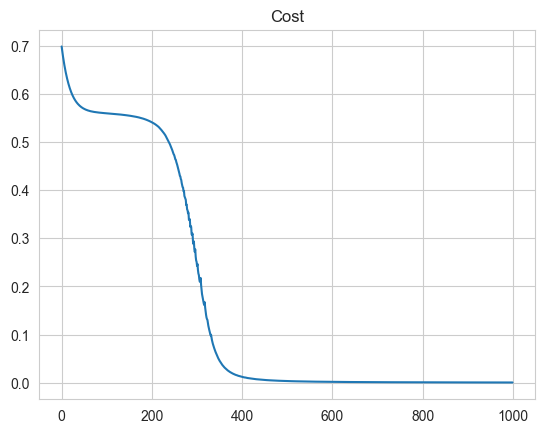

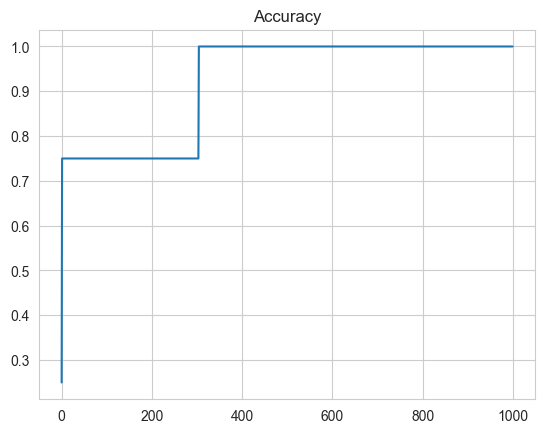

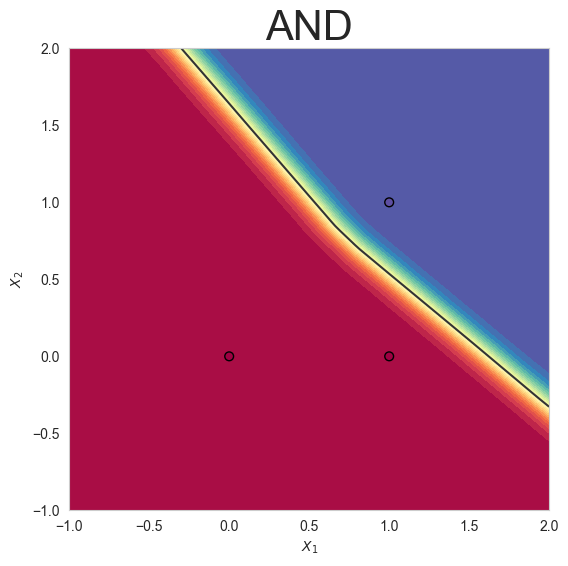

In [410]:
# 2. Nubraižykite nuostolių funkcijos ir modelio tikslumo reikšmes.

network = init_network(architecture = [
    {"size":  2},
    {"size": 25, "activation": "relu"},
    {"size": 50, "activation": "relu"},
    {"size": 50, "activation": "relu"},
    {"size": 25, "activation": "relu"},
    {"size":  1, "activation": "sigmoid"}
], seed=2)

X_train = np.array([[0,0],[0,1],[1,0],[1,1]])
Y_train = np.array([0,0,0,1])
cost_history, accuracy_history = train(X_train.T, np.transpose(Y_train.reshape((Y_train.shape[0], 1))), network, 1000, 0.1)

viz_train_results("AND", X_train, Y_train, cost_history, accuracy_history, network)

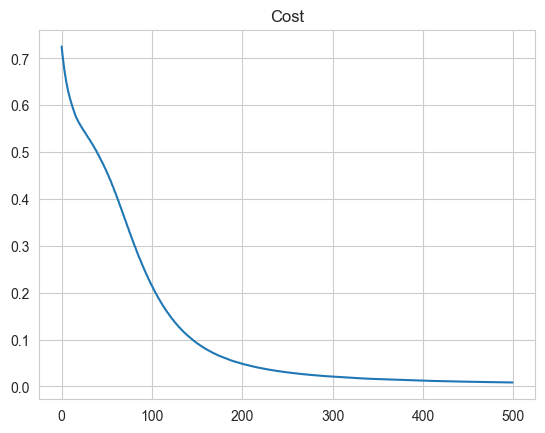

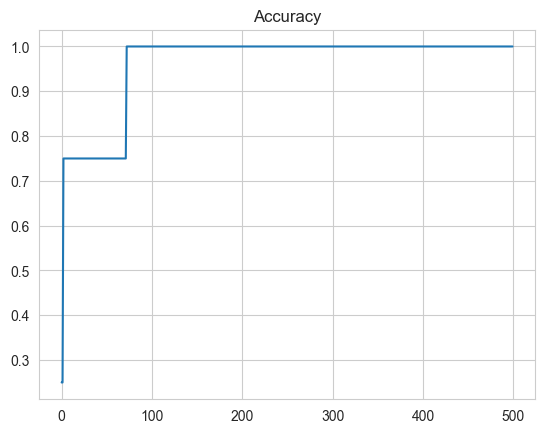

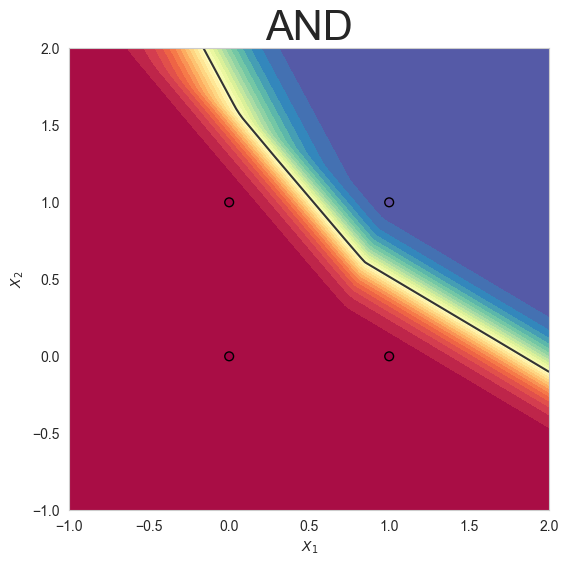

In [417]:
# 3. Pakeiskite tinklo architektūrą bei mokymosi greitį, epochų skaičių, analizuokite (2) punkte nurodytus grafikus.

network = init_network(architecture = [
    {"size":  2},
    {"size": 25, "activation": "relu"},
    {"size":  1, "activation": "sigmoid"}
], seed=2)

X_train = np.array([[0,0],[0,1],[1,0],[1,1]])
Y_train = np.array([0,0,0,1])
cost_history, accuracy_history = train(X_train.T, np.transpose(Y_train.reshape((Y_train.shape[0], 1))), network, 500, 0.2)

viz_train_results("AND", X_train, Y_train, cost_history, accuracy_history, network)

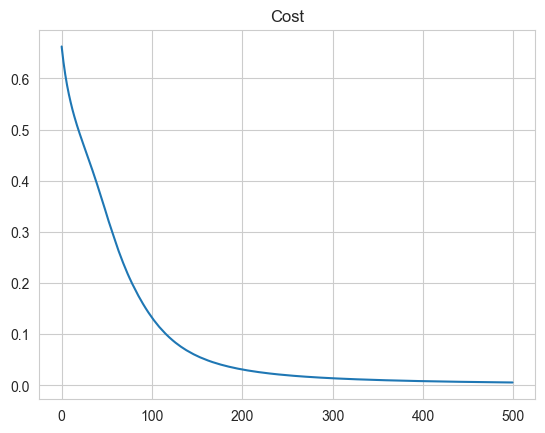

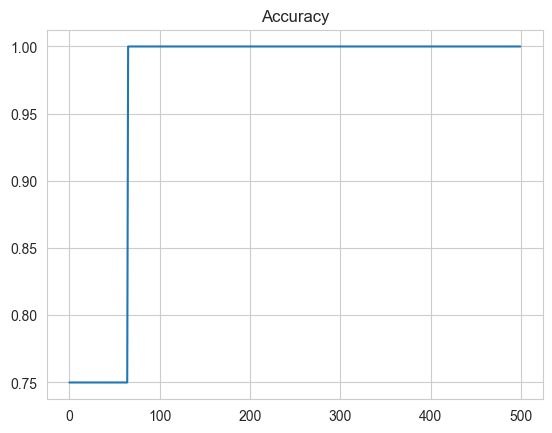

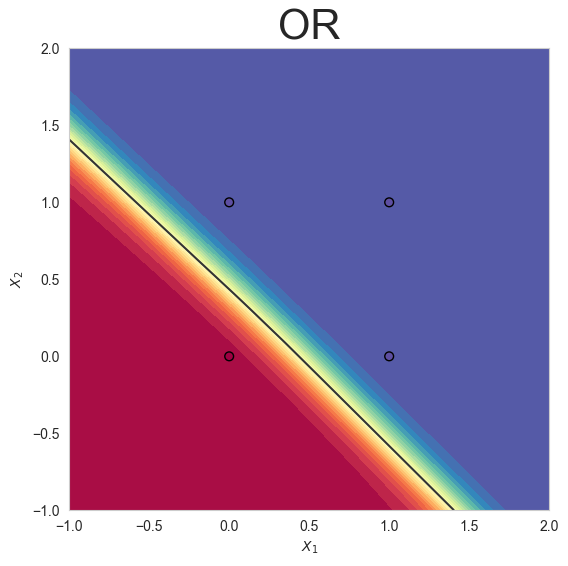

In [415]:
# 4.1. Pakeiskite tinklo apmokymo įmtį į kitas operacijas (OR, XOR) ir kartokite (3) punktą. (OR)

network = init_network(architecture = [
    {"size":  2},
    {"size": 25, "activation": "relu"},
    {"size":  1, "activation": "sigmoid"}
], seed=2)

X_train = np.array([[0,0],[0,1],[1,0],[1,1]])
Y_train = np.array([0,1,1,1])
cost_history, accuracy_history = train(X_train.T, np.transpose(Y_train.reshape((Y_train.shape[0], 1))), network, 500, 0.2)

viz_train_results("OR", X_train, Y_train, cost_history, accuracy_history, network)

[[0 0]
 [0 1]
 [1 0]
 [1 1]]


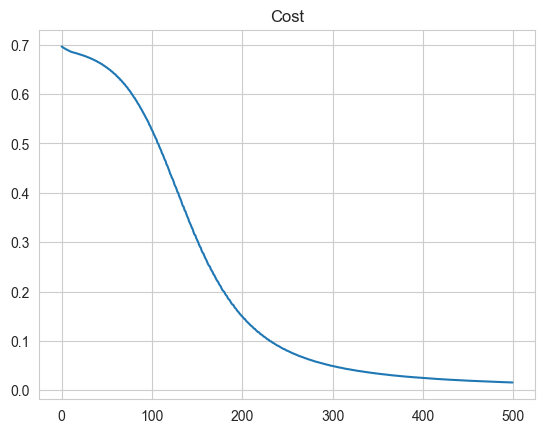

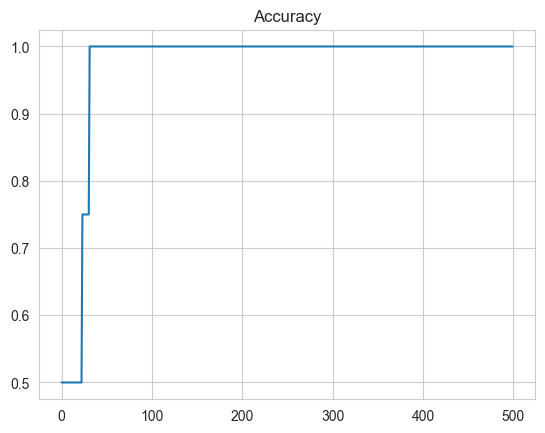

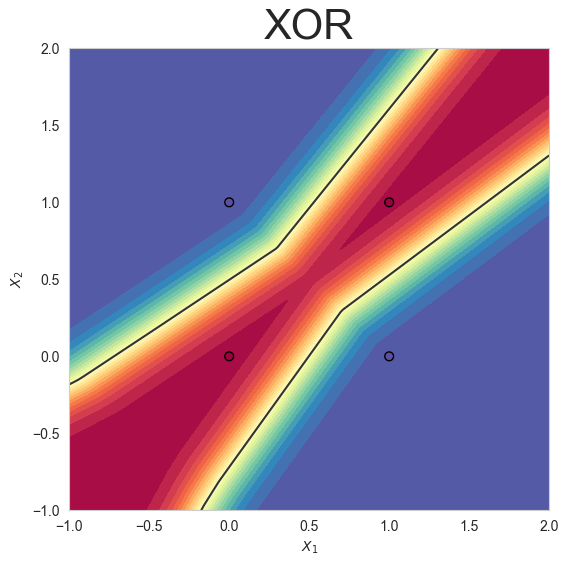

In [440]:
# 4.2. Pakeiskite tinklo apmokymo įmtį į kitas operacijas (OR, XOR) ir kartokite (3) punktą. (XOR)

network = init_network(architecture = [
    {"size":  2},
    {"size": 25, "activation": "relu"},
    {"size":  1, "activation": "sigmoid"}
], seed=2)

X_train = np.array([[0,0],[0,1],[1,0],[1,1]])
Y_train = np.array([0,1,1,0])
cost_history, accuracy_history = train(X_train.T, np.transpose(Y_train.reshape((Y_train.shape[0], 1))), network, 500, 0.2)

print(X_train)

viz_train_results("XOR", X_train, Y_train, cost_history, accuracy_history, network)

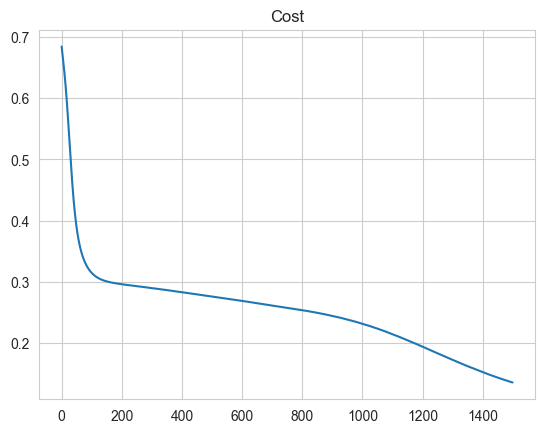

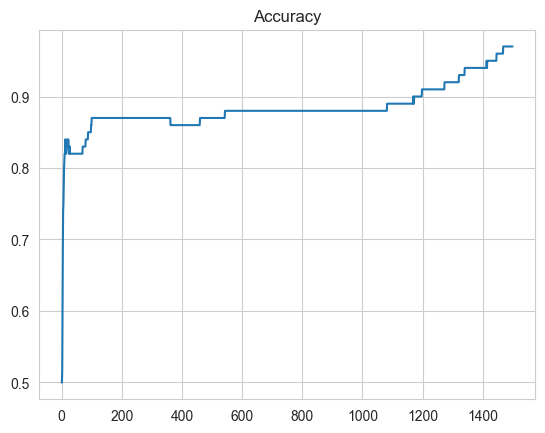

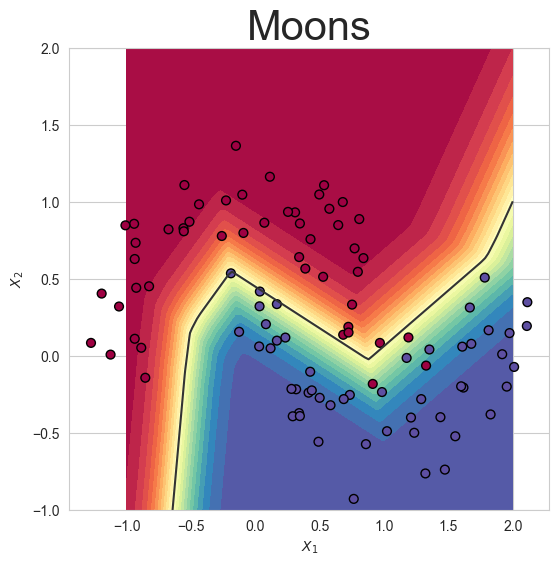

In [471]:
# 5. Pakeiskite tinklo apmokymo įmtį į Moons duomenų rinkinį ir kartokite (3) punktą.

network = init_network(architecture = [
    {"size":  2},
    {"size": 25, "activation": "relu"},
    {"size":  1, "activation": "sigmoid"}
], seed=2)

X, Y = make_moons(n_samples = 100, noise=0.2, random_state=100)

cost_history, accuracy_history = train(X.T, np.transpose(Y.reshape((Y.shape[0], 1))), network, 1500, 0.20)

viz_train_results("Moons", X, Y, cost_history, accuracy_history, network)

[ True  True False ... False  True  True]


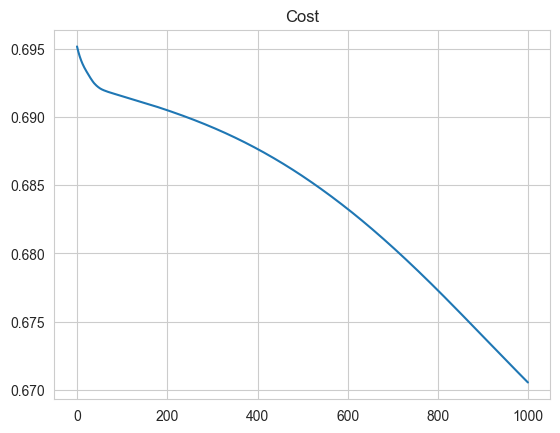

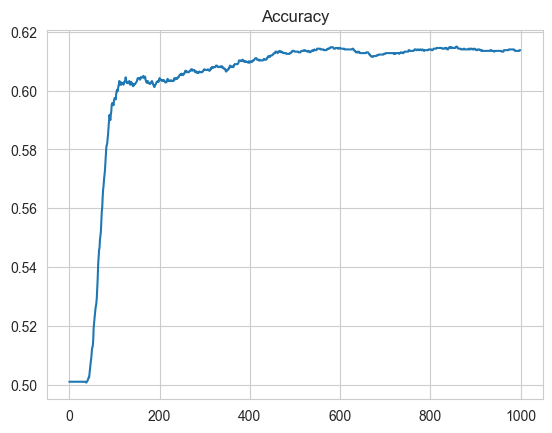

[ True  True False ... False  True  True]


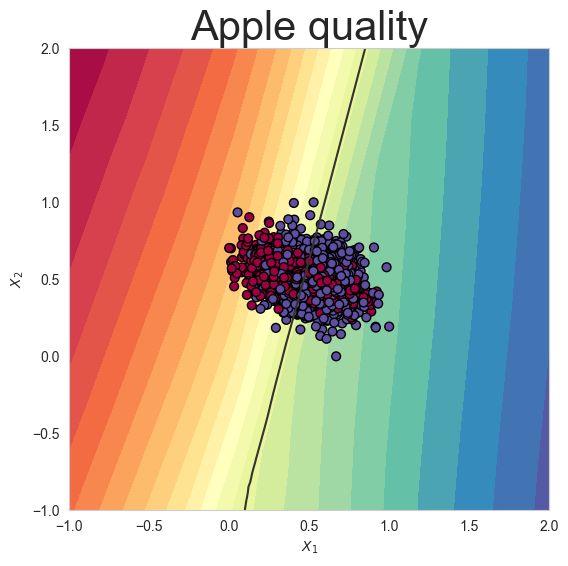

In [457]:
# 6. Pamėginkite rasti realaus pasaulio duomenų rinkinį ir kartokite (3) punktą.

def prepare_number_list(numbers):
    return np.array(list(map(lambda value: [float(value)], numbers)))

def normalize_column(column):
    min_value = min(column)
    max_value = max(column)

    return map(lambda x: map_value(float(x), min_value, max_value, 0, 1), column)

df = pd.read_csv('assets/apple_quality.csv')
X0 = normalize_column(df['Juiciness'].values)
X1 = normalize_column(df['Crunchiness'].values)
X = np.array(list(zip(X0, X1)))
Y = (df['Quality'] == 'good').values

network = init_network(architecture = [
    {"size":  2},
    {"size": 25, "activation": "relu"},
    {"size":  1, "activation": "sigmoid"}
], seed=2)

cost_history, accuracy_history = train(X.T, np.transpose(Y.reshape((Y.shape[0], 1))), network, 1000, 0.1)

viz_train_results("Apple quality", X, Y, cost_history, accuracy_history, network)

In [ ]:
# 6. Pakeiskite nuostolių funkciją į MSE, palyginkite rezultatus.